In [111]:
import numpy as np
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import collections
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import RidgeCV
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.metrics import mean_squared_error
# from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from xgboost import XGBClassifier

In [2]:
%matplotlib inline

In [3]:
sns.set(color_codes=True)

# Q1 - Data Exploration

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [6]:
df = df.drop(['bidid','userid','slotid','IP','creative','keypage', 'domain','url','urlid'], axis = 1)

In [7]:
df.head()

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag
0,0,5,22,windows_ie,2,2,2,200,200,2,0,5,238,5,3427,null
1,0,1,20,windows_chrome,238,239,1,300,250,FourthView,Na,0,294,23,2821,null
2,0,3,13,windows_ie,40,41,2,250,250,2,0,5,238,24,3427,"10052,10006,13866,10110"
3,0,6,23,windows_ie,1,1,1,160,600,2,1,0,300,25,1458,"13866,10063,10111"
4,0,5,6,windows_ie,216,233,2,728,90,OtherView,Na,133,277,133,2259,null


# CTR Analysis

# Weekday

In [36]:
df_weekday = df['click'].groupby([df['advertiser'],df['weekday']])

In [37]:
a = df_weekday.mean().unstack()
a

weekday,0,1,2,3,4,5,6
advertiser,,,,,,,
1458,0.000681,0.000951,0.000706,0.000755,0.000887,0.000866,0.000645
2259,0.000365,0.000333,NaN,NaN,NaN,0.000273,0.000321
2261,NaN,NaN,NaN,0.000322,0.000297,0.000354,0.000340
2821,0.000700,0.000559,0.000511,NaN,NaN,NaN,NaN
2997,NaN,NaN,0.010476,0.003179,0.002769,0.003204,NaN
3358,0.000746,0.000599,0.000266,0.001027,0.000758,0.000750,0.000694
3386,0.000748,0.000719,0.000744,0.000683,0.000729,0.000830,0.000487
3427,0.000578,0.000609,0.000725,0.000736,0.000603,0.000653,0.000803
3476,0.000548,0.000759,0.000723,0.000477,0.000753,0.000271,0.000481


In [45]:
a = a.fillna(0)
a

weekday,0,1,2,3,4,5,6
advertiser,,,,,,,
1458,0.000681,0.000951,0.000706,0.000755,0.000887,0.000866,0.000645
2259,0.000365,0.000333,0.000000,0.000000,0.000000,0.000273,0.000321
2261,0.000000,0.000000,0.000000,0.000322,0.000297,0.000354,0.000340
2821,0.000700,0.000559,0.000511,0.000000,0.000000,0.000000,0.000000
2997,0.000000,0.000000,0.010476,0.003179,0.002769,0.003204,0.000000
3358,0.000746,0.000599,0.000266,0.001027,0.000758,0.000750,0.000694
3386,0.000748,0.000719,0.000744,0.000683,0.000729,0.000830,0.000487
3427,0.000578,0.000609,0.000725,0.000736,0.000603,0.000653,0.000803
3476,0.000548,0.000759,0.000723,0.000477,0.000753,0.000271,0.000481


In [72]:
b = a.loc[[1458]].T
c = a.loc[[3386]].T

In [61]:
b

weekday
0    0.000681
1    0.000951
2    0.000706
3    0.000755
4    0.000887
5    0.000866
6    0.000645
Name: 1458, dtype: float64

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


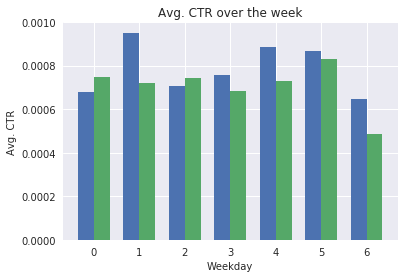

In [73]:
# CTR for weekdays
width = .35
index = np.arange(len(b))
plt.bar(index,b[1458],width)
plt.bar (index+width,c[3386],width)
plt.xlabel('Weekday', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.xticks(index+width/2, index, fontsize=10)
plt.title('Avg. CTR over the week')
plt.legend()
plt.show()

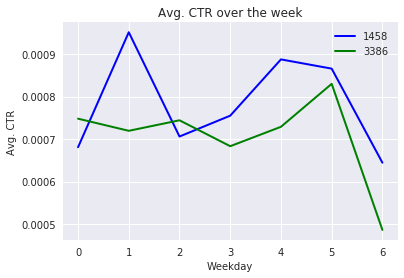

In [78]:
index = np.arange(len(b))

plt.plot(index, b[1458], marker='', color='blue', linewidth=2)
plt.plot(index, c[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.xlabel('Weekday', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.title('Avg. CTR over the week')
plt.legend()

# Hour

In [75]:
df_hour = df['click'].groupby([df['advertiser'],df['hour']])
hour = df_hour.mean().unstack()
hour = hour.fillna(0)
b_hour = hour.loc[[1458]].T
c_hour = hour.loc[[3386]].T

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


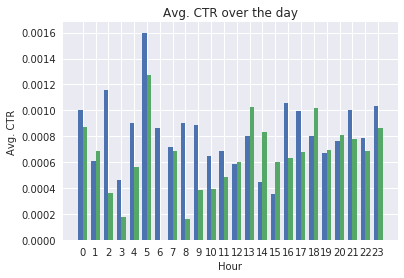

In [76]:
width = .35
index = np.arange(len(b_hour))
plt.bar(index,b_hour[1458],width)
plt.bar (index+width,c_hour[3386],width)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.xticks(index+width/2, index, fontsize=10)
plt.title('Avg. CTR over the day')
plt.legend()
plt.show()

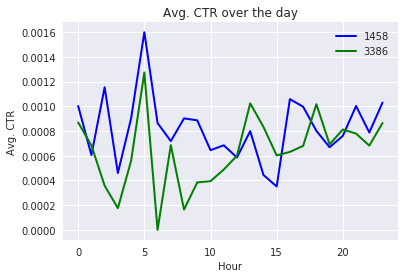

In [79]:
index = np.arange(len(b_hour))

plt.plot(index, b_hour[1458], marker='', color='blue', linewidth=2)
plt.plot(index, c_hour[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.title('Avg. CTR over the day')
plt.legend()

# Region

In [88]:
df_region = df['click'].groupby([df['advertiser'],df['region']])
region = df_region.mean().unstack()
region = region.fillna(0)
b_region = region.loc[[1458]].T
c_region = region.loc[[3386]].T

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


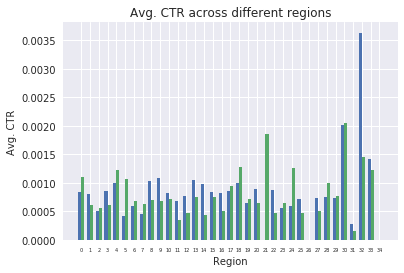

In [91]:
width = .35
index = np.arange(len(b_region))
#index_browser = ['android_chrome','1','2','3','4','android_other','android_safari','7','8','ios_safari','10','11','12','13','14','15','16','17','18','19','20'
#                '21','22','23','24','25','26','27','28','windows_chrome','windows_firefox','windows_ie','32','33','34','35','36','37']
    
plt.bar(index,b_region[1458],width)
plt.bar (index+width,c_region[3386],width)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.xticks(index+width/2, index, fontsize=5)
plt.title('Avg. CTR across different regions')
plt.legend()
plt.show()

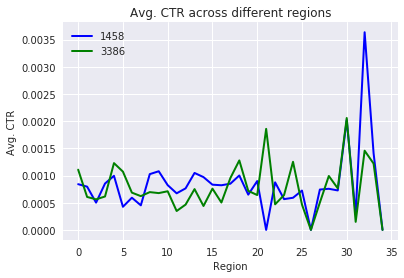

In [90]:
index = np.arange(len(b_region))

plt.plot(index, b_region[1458], marker='', color='blue', linewidth=2)
plt.plot(index, c_region[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.xticks(index, index_browser, fontsize=10, rotation = 30)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.title('Avg. CTR across different regions')
plt.legend()

# Ad Exchange

In [92]:
df_adex = df['click'].groupby([df['advertiser'],df['adexchange']])
adex = df_adex.mean().unstack()
adex = adex.fillna(0)
b_adex = adex.loc[[1458]].T
c_adex = adex.loc[[3386]].T

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


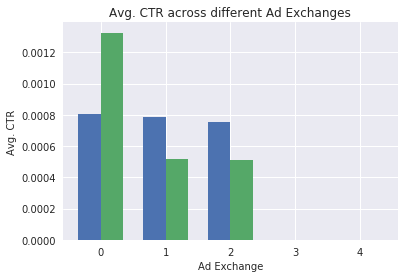

In [93]:
width = .35
index = np.arange(len(b_adex))
#index_browser = ['android_chrome','1','2','3','4','android_other','android_safari','7','8','ios_safari','10','11','12','13','14','15','16','17','18','19','20'
#                '21','22','23','24','25','26','27','28','windows_chrome','windows_firefox','windows_ie','32','33','34','35','36','37']
    
plt.bar(index,b_adex[1458],width)
plt.bar (index+width,c_adex[3386],width)
plt.xlabel('Ad Exchange', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.xticks(index+width/2, index, fontsize=10)
plt.title('Avg. CTR across different Ad Exchanges')
plt.legend()
plt.show()

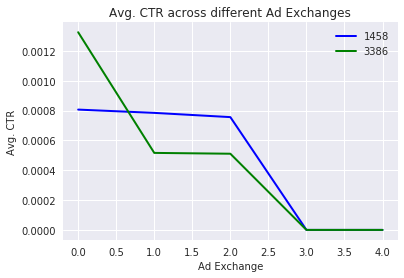

In [94]:
index = np.arange(len(b_adex))

plt.plot(index, b_adex[1458], marker='', color='blue', linewidth=2)
plt.plot(index, c_adex[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.xticks(index, index_browser, fontsize=10, rotation = 30)
plt.xlabel('Ad Exchange', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.title('Avg. CTR across different Ad Exchanges')
plt.legend()

# Slot Visibility

In [95]:
df['slotvisibility'].unique()

array(['2', 'FourthView', 'OtherView', '0', '1', 'Na', 'FirstView',
       'SecondView', '255', 'FifthView', 'ThirdView'], dtype=object)

In [8]:
def text_to_numeric(x):
    if x=='FirstView' or x=='1':
        return 1
    if x=='SecondView' or x=='2':
        return 2
    if x=='ThirdView':
        return 3
    if x=='FourthView':
        return 4
    if x=='FifthView':
        return 5
    if x=='OtherView' or x=='255' or x=='0' or x=='Na':
        return 0
    else:
        return x

In [9]:
df['slotvisibility_with_num'] = df['slotvisibility'].apply(text_to_numeric)
df

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag,slotvisibility_with_num
0,0,5,22,windows_ie,2,2,2,200,200,2,0,5,238,5,3427,null,2
1,0,1,20,windows_chrome,238,239,1,300,250,FourthView,Na,0,294,23,2821,null,4
2,0,3,13,windows_ie,40,41,2,250,250,2,0,5,238,24,3427,"10052,10006,13866,10110",2
3,0,6,23,windows_ie,1,1,1,160,600,2,1,0,300,25,1458,"13866,10063,10111",2
4,0,5,6,windows_ie,216,233,2,728,90,OtherView,Na,133,277,133,2259,null,0
5,0,4,17,windows_ie,276,277,1,336,280,2,1,0,300,123,1458,"10006,10077,10063,10057,10110",2
6,0,3,12,windows_ie,80,89,3,1000,90,0,0,20,300,20,3386,"10083,10024,10063,13496,10093,10006,10057,10110",0
7,0,3,16,windows_ie,15,19,1,160,600,2,1,0,300,134,1458,"10063,10024,13800,13866,10006,10111",2
8,0,5,14,windows_ie,333,342,3,1000,90,0,0,70,300,70,1458,"10063,10006,10083,10110",0
9,0,5,0,windows_chrome,2,2,3,1000,90,0,0,70,241,77,3358,"13403,10031,10063,10083,10006,10077,10075,10110",0


In [108]:
df['slotvisibility_with_num'] = df['slotvisibility_with_num'].fillna(0)

In [112]:
df_slv = df['click'].groupby([df['advertiser'],df['slotvisibility_with_num']])
slv = df_slv.mean().unstack()
slv = slv.fillna(0)
b_slv = slv.loc[[1458]].T
c_slv = slv.loc[[3386]].T
b_slv

advertiser,1458
slotvisibility_with_num,
0,0.000805
1,0.000944
2,0.000714
3,0.000000
4,0.000000
5,0.000000


/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


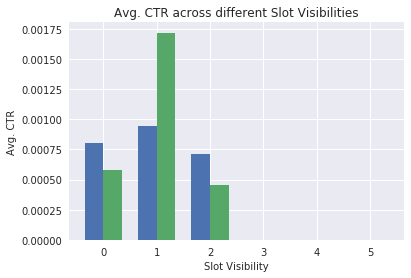

In [113]:
width = .35
index = np.arange(len(b_slv))
#index_browser = ['android_chrome','1','2','3','4','android_other','android_safari','7','8','ios_safari','10','11','12','13','14','15','16','17','18','19','20'
#                '21','22','23','24','25','26','27','28','windows_chrome','windows_firefox','windows_ie','32','33','34','35','36','37']
    
plt.bar(index,b_slv[1458],width)
plt.bar (index+width,c_slv[3386],width)
plt.xlabel('Slot Visibility', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.xticks(index+width/2, index, fontsize=10)
plt.title('Avg. CTR across different Slot Visibilities')
plt.legend()
plt.show()

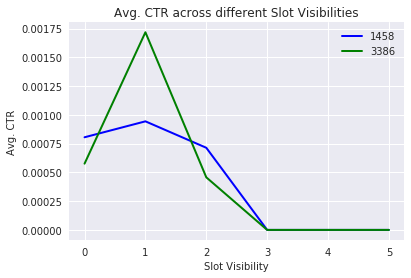

In [114]:
index = np.arange(len(b_slv))

plt.plot(index, b_slv[1458], marker='', color='blue', linewidth=2)
plt.plot(index, c_slv[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.xticks(index, index_browser, fontsize=10, rotation = 30)
plt.xlabel('Slot Visibility', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.title('Avg. CTR across different Slot Visibilities')
plt.legend()

# Slot size

In [10]:
df['slotarea'] = df['slotwidth']*df['slotheight']
df

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag,slotvisibility_with_num,slotarea
0,0,5,22,windows_ie,2,2,2,200,200,2,0,5,238,5,3427,null,2,40000
1,0,1,20,windows_chrome,238,239,1,300,250,FourthView,Na,0,294,23,2821,null,4,75000
2,0,3,13,windows_ie,40,41,2,250,250,2,0,5,238,24,3427,"10052,10006,13866,10110",2,62500
3,0,6,23,windows_ie,1,1,1,160,600,2,1,0,300,25,1458,"13866,10063,10111",2,96000
4,0,5,6,windows_ie,216,233,2,728,90,OtherView,Na,133,277,133,2259,null,0,65520
5,0,4,17,windows_ie,276,277,1,336,280,2,1,0,300,123,1458,"10006,10077,10063,10057,10110",2,94080
6,0,3,12,windows_ie,80,89,3,1000,90,0,0,20,300,20,3386,"10083,10024,10063,13496,10093,10006,10057,10110",0,90000
7,0,3,16,windows_ie,15,19,1,160,600,2,1,0,300,134,1458,"10063,10024,13800,13866,10006,10111",2,96000
8,0,5,14,windows_ie,333,342,3,1000,90,0,0,70,300,70,1458,"10063,10006,10083,10110",0,90000
9,0,5,0,windows_chrome,2,2,3,1000,90,0,0,70,241,77,3358,"13403,10031,10063,10083,10006,10077,10075,10110",0,90000


In [50]:
df_slot = df['click'].groupby([df['advertiser'],df['slotarea']])
slot = df_slot.mean().unstack()
slot = slot.fillna(0)
b_slot = slot.loc[[1458]].T
c_slot = slot.loc[[3386]].T
b_slot

advertiser,1458
slotarea,
14040,0.000000
15625,0.000000
16000,0.000000
27000,0.000000
28080,0.000505
28800,0.000000
30000,0.000000
37200,0.000000
40000,0.000000


/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


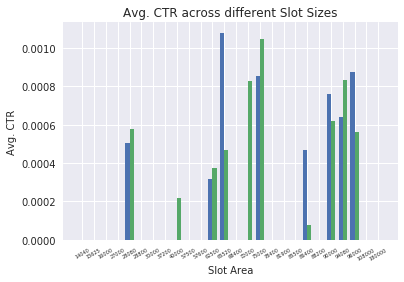

In [51]:
width = .35
index = np.arange(len(b_slot))
index_slot = ['14040','15625','16000','27000','28080','28800','30000','37200','40000','57500','57600','62500',
              '65520','68400','72000','75000','78400','81900', '85500','86400','88200','90000','94080','96000',
              '108000', '180000']
     
plt.bar(index,b_slot[1458],width)
plt.bar (index+width,c_slot[3386],width)
plt.xlabel('Slot Area', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.xticks(index+width/2, index_slot, fontsize=5, rotation = 30)
plt.title('Avg. CTR across different Slot Sizes')
plt.legend()
plt.show()

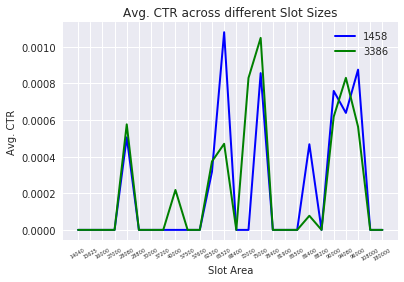

In [124]:
index = np.arange(len(b_slot))

plt.plot(index, b_slot[1458], marker='', color='blue', linewidth=2)
plt.plot(index, c_slot[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.xticks(index, index_slot, fontsize=5, rotation = 30)
plt.xlabel('Slot Area', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.title('Avg. CTR across different Slot Sizes')
plt.legend()

# eCPC Analysis

# Weekday

In [18]:
ecpc_wkday_click = df['click'].groupby([df['advertiser'],df['weekday']])
ecpc_wkday_click_sum = ecpc_wkday_click.sum().unstack() 
ecpc_wkday_click_sum = ecpc_wkday_click_sum.fillna(0)
ecpc_wkday_click_sum

weekday,0,1,2,3,4,5,6
advertiser,,,,,,,
1458,52.0,63.0,48.0,52.0,62.0,62.0,46.0
2259,13.0,9.0,0.0,0.0,0.0,10.0,11.0
2261,0.0,0.0,0.0,8.0,10.0,12.0,6.0
2821,70.0,47.0,14.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,94.0,46.0,48.0,29.0,0.0
3358,22.0,16.0,6.0,73.0,27.0,38.0,20.0
3386,53.0,44.0,47.0,42.0,48.0,52.0,34.0
3427,29.0,33.0,43.0,42.0,36.0,40.0,49.0
3476,32.0,37.0,34.0,20.0,33.0,4.0,27.0


In [20]:
ecpc_wkday_payprice = df['payprice'].groupby([df['advertiser'],df['weekday']])
ecpc_wkday_payprice_sum = ecpc_wkday_payprice.sum().unstack() 
ecpc_wkday_payprice_sum = ecpc_wkday_payprice_sum.fillna(0)
ecpc_wkday_payprice_sum = ecpc_wkday_payprice_sum/1000
ecpc_wkday_payprice_sum

weekday,0,1,2,3,4,5,6
advertiser,,,,,,,
1458,4835.842,4921.047,4916.029,4810.175,4835.363,4861.945,4788.335
2259,3580.271,2657.039,0.000,0.000,0.000,3179.798,3011.130
2261,0.000,0.000,0.000,2036.561,3049.423,3271.099,1516.696
2821,8637.698,7473.025,2717.321,0.000,0.000,0.000,0.000
2997,0.000,0.000,521.330,890.370,1155.242,562.325,0.000
3358,2439.816,2253.581,1999.657,5731.008,3124.803,4500.793,2397.573
3386,4787.271,4867.197,5187.993,4948.435,5236.192,5006.923,4897.812
3427,3454.813,4242.172,4599.220,4410.078,4640.594,4745.100,4366.734
3476,4468.404,3870.860,3786.411,3167.220,3276.092,1055.991,4293.801


In [23]:
ecpc_wkday = ecpc_wkday_payprice_sum/ecpc_wkday_click_sum
ecpc_wkday = ecpc_wkday.fillna(0)
ecpc_wkday
x_wkday = ecpc_wkday.loc[[1458]].T
y_wkday = ecpc_wkday.loc[[3386]].T

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


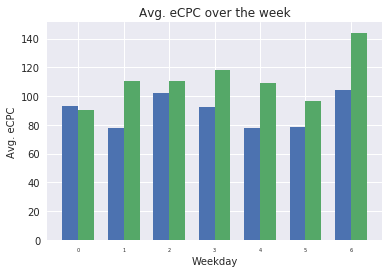

In [25]:
width = .35
index = np.arange(len(x_wkday))
#index_browser = ['android_chrome','1','2','3','4','android_other','android_safari','7','8','ios_safari','10','11','12','13','14','15','16','17','18','19','20'
#                '21','22','23','24','25','26','27','28','windows_chrome','windows_firefox','windows_ie','32','33','34','35','36','37']
    
plt.bar(index,x_wkday[1458],width)
plt.bar (index+width,y_wkday[3386],width)
plt.xlabel('Weekday', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.xticks(index+width/2, index, fontsize=5)
plt.title('Avg. eCPC over the week')
plt.legend()
plt.show()

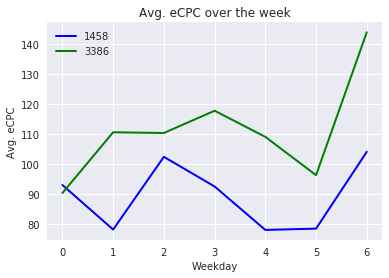

In [26]:
index = np.arange(len(x_wkday))

plt.plot(index, x_wkday[1458], marker='', color='blue', linewidth=2)
plt.plot(index, y_wkday[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.xticks(index, index_browser, fontsize=10, rotation = 30)
plt.xlabel('Weekday', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.title('Avg. eCPC over the week')
plt.legend()

# Hour 

In [27]:
ecpc_hour_click = df['click'].groupby([df['advertiser'],df['hour']])
ecpc_hour_click_sum = ecpc_hour_click.sum().unstack() 
ecpc_hour_click_sum = ecpc_hour_click_sum.fillna(0)
ecpc_hour_click_sum

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,23.0,6.0,7.0,3.0,3.0,6.0,4.0,7.0,13.0,16.0,...,13.0,10.0,30.0,29.0,23.0,19.0,20.0,29.0,25.0,24.0
2259,1.0,0.0,3.0,2.0,1.0,0.0,2.0,2.0,1.0,1.0,...,2.0,2.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
2261,1.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,5.0,5.0,2.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0
2821,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,...,7.0,7.0,2.0,5.0,11.0,23.0,12.0,11.0,17.0,9.0
2997,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,...,7.0,10.0,29.0,47.0,43.0,36.0,3.0,10.0,9.0,8.0
3358,38.0,4.0,4.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,...,1.0,13.0,6.0,6.0,7.0,6.0,4.0,1.0,55.0,18.0
3386,31.0,6.0,2.0,1.0,2.0,4.0,0.0,6.0,2.0,5.0,...,24.0,15.0,16.0,17.0,33.0,15.0,21.0,19.0,16.0,25.0
3427,20.0,10.0,2.0,3.0,0.0,1.0,0.0,6.0,5.0,8.0,...,17.0,15.0,20.0,21.0,17.0,10.0,21.0,15.0,14.0,18.0
3476,5.0,4.0,3.0,2.0,4.0,2.0,0.0,7.0,3.0,5.0,...,5.0,15.0,17.0,12.0,17.0,10.0,10.0,7.0,2.0,0.0


In [28]:
ecpc_hour_payprice = df['payprice'].groupby([df['advertiser'],df['hour']])
ecpc_hour_payprice_sum = ecpc_hour_payprice.sum().unstack() 
ecpc_hour_payprice_sum = ecpc_hour_payprice_sum.fillna(0)
ecpc_hour_payprice_sum = ecpc_hour_payprice_sum/1000
ecpc_hour_payprice_sum

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,1505.347,619.858,397.473,470.030,227.050,271.763,305.234,680.710,1038.985,1241.422,...,2031.027,1994.180,1966.562,2018.751,1956.882,1996.639,1820.541,1970.079,2068.973,1558.428
2259,787.059,396.629,272.420,298.636,217.473,230.230,247.700,263.501,480.993,716.140,...,987.200,954.822,969.154,855.237,478.906,376.831,2.565,0.000,0.000,0.000
2261,447.839,260.313,175.050,154.882,89.480,90.447,84.904,167.160,337.705,490.671,...,786.910,1195.719,1172.663,1087.201,596.760,0.000,0.000,0.000,0.000,0.000
2821,535.862,266.494,181.591,196.567,122.471,127.433,137.578,191.186,350.152,500.958,...,682.309,661.315,651.009,669.475,1852.989,2256.952,2195.265,1757.589,1487.570,1266.346
2997,11.930,10.250,5.808,9.625,7.244,8.246,7.634,9.523,12.527,18.318,...,172.522,328.066,380.337,519.331,419.134,323.770,117.719,179.105,210.847,167.910
3358,5922.725,545.882,231.395,94.139,96.653,73.731,209.107,190.412,562.090,302.373,...,709.095,1234.939,674.105,612.057,625.989,475.691,398.271,25.968,4386.238,1344.770
3386,3356.419,492.411,290.073,293.817,204.544,169.966,149.996,656.079,968.979,928.308,...,2277.120,1875.430,1898.183,1937.625,2873.199,1609.571,2010.776,1814.144,1548.962,2307.426
3427,1606.172,1068.798,292.728,309.775,104.246,193.752,277.632,841.055,897.455,855.925,...,1328.467,1771.558,2330.313,1964.438,2333.459,1278.816,1984.728,1087.313,1327.647,1593.059
3476,1298.151,566.961,434.311,421.950,226.237,238.288,298.185,576.485,910.601,1195.882,...,1491.626,1600.106,1497.759,1569.614,1485.606,1111.183,1028.511,806.629,520.725,296.795


In [29]:
ecpc_hour = ecpc_hour_payprice_sum/ecpc_hour_click_sum
ecpc_hour = ecpc_hour.fillna(0)
x_hour = ecpc_hour.loc[[1458]].T
y_hour = ecpc_hour.loc[[3386]].T

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


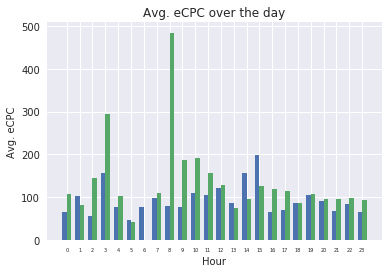

In [30]:
width = .35
index = np.arange(len(x_hour))
#index_browser = ['android_chrome','1','2','3','4','android_other','android_safari','7','8','ios_safari','10','11','12','13','14','15','16','17','18','19','20'
#                '21','22','23','24','25','26','27','28','windows_chrome','windows_firefox','windows_ie','32','33','34','35','36','37']
    
plt.bar(index,x_hour[1458],width)
plt.bar (index+width,y_hour[3386],width)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.xticks(index+width/2, index, fontsize=5)
plt.title('Avg. eCPC over the day')
plt.legend()
plt.show()

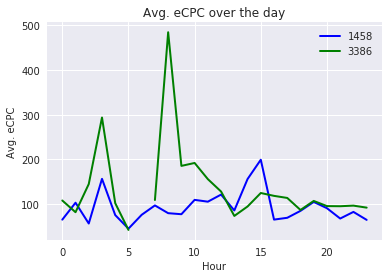

In [31]:
index = np.arange(len(x_hour))

plt.plot(index, x_hour[1458], marker='', color='blue', linewidth=2)
plt.plot(index, y_hour[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.xticks(index, index_browser, fontsize=10, rotation = 30)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.title('Avg. eCPC over the day')
plt.legend()

# Region

In [32]:
ecpc_region_click = df['click'].groupby([df['advertiser'],df['region']])
ecpc_region_click_sum = ecpc_region_click.sum().unstack() 
ecpc_region_click_sum = ecpc_region_click_sum.fillna(0)
ecpc_region_click_sum

region,0,1,2,3,15,27,40,55,65,79,...,308,325,333,344,359,368,374,393,394,395
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,6.0,17.0,4.0,21.0,15.0,3.0,11.0,5.0,12.0,14.0,...,5.0,0.0,11.0,4.0,1.0,4.0,2.0,5.0,1.0,0.0
2259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2261,4.0,1.0,0.0,5.0,1.0,2.0,1.0,1.0,3.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2821,2.0,6.0,3.0,2.0,7.0,3.0,2.0,2.0,4.0,0.0,...,2.0,0.0,5.0,1.0,0.0,0.0,5.0,1.0,0.0,0.0
2997,0.0,5.0,4.0,6.0,5.0,1.0,6.0,3.0,1.0,2.0,...,5.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3358,10.0,11.0,4.0,6.0,8.0,2.0,3.0,2.0,3.0,5.0,...,2.0,0.0,8.0,1.0,0.0,0.0,6.0,3.0,4.0,0.0
3386,10.0,13.0,4.0,14.0,16.0,7.0,11.0,6.0,7.0,8.0,...,3.0,0.0,7.0,5.0,1.0,4.0,1.0,3.0,1.0,0.0
3427,6.0,16.0,5.0,20.0,11.0,2.0,5.0,6.0,6.0,5.0,...,4.0,0.0,13.0,2.0,2.0,3.0,3.0,2.0,4.0,0.0
3476,5.0,15.0,5.0,10.0,7.0,5.0,3.0,3.0,2.0,7.0,...,0.0,1.0,4.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0


In [33]:
ecpc_region_payprice = df['payprice'].groupby([df['advertiser'],df['region']])
ecpc_region_payprice_sum = ecpc_region_payprice.sum().unstack() 
ecpc_region_payprice_sum = ecpc_region_payprice_sum.fillna(0)
ecpc_region_payprice_sum = ecpc_region_payprice_sum/1000
ecpc_region_payprice_sum

region,0,1,2,3,15,27,40,55,65,79,...,308,325,333,344,359,368,374,393,394,395
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,457.854,1557.460,566.926,1715.541,1048.646,481.169,1241.677,748.298,810.676,1076.482,...,476.348,10.613,1002.042,352.990,92.832,133.485,472.573,75.276,40.140,6.926
2259,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2261,984.176,259.991,113.245,408.847,239.378,145.252,341.727,196.695,267.546,238.092,...,177.041,4.080,272.869,82.074,24.015,38.328,127.056,146.777,56.115,7.841
2821,555.917,850.826,307.395,890.031,449.636,273.679,701.364,385.265,462.898,546.817,...,306.905,8.210,517.979,163.389,39.201,74.420,226.134,104.845,52.832,5.775
2997,0.484,155.772,91.187,115.693,64.792,26.018,58.056,41.701,45.901,115.800,...,62.102,0.593,62.005,19.376,5.065,6.362,19.939,8.943,9.515,0.000
3358,424.352,921.866,376.310,1005.095,624.284,290.731,678.201,359.920,428.131,782.688,...,382.170,7.862,650.662,218.254,57.975,76.723,356.602,136.701,75.440,7.082
3386,567.635,1545.407,560.146,1764.149,1028.983,506.376,1215.017,716.411,781.114,1048.149,...,522.221,12.087,1045.670,378.809,98.119,144.881,510.073,86.202,53.676,8.413
3427,455.236,1312.204,508.220,1551.855,897.713,449.592,1123.929,659.137,722.160,857.080,...,443.479,10.374,901.577,328.352,83.162,128.671,426.454,96.511,57.812,7.322
3476,338.230,1361.028,425.938,1040.018,607.503,282.629,883.557,509.294,515.113,919.984,...,309.004,8.304,672.279,215.965,54.113,82.823,269.874,15.111,23.404,4.602


In [34]:
ecpc_region = ecpc_region_payprice_sum/ecpc_region_click_sum
ecpc_region = ecpc_region.fillna(0)
x_region = ecpc_region.loc[[1458]].T
y_region = ecpc_region.loc[[3386]].T

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


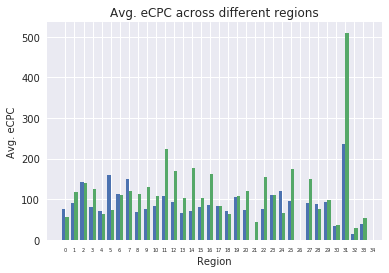

In [35]:
width = .35
index = np.arange(len(x_region))
#index_browser = ['android_chrome','1','2','3','4','android_other','android_safari','7','8','ios_safari','10','11','12','13','14','15','16','17','18','19','20'
#                '21','22','23','24','25','26','27','28','windows_chrome','windows_firefox','windows_ie','32','33','34','35','36','37']
    
plt.bar(index,x_region[1458],width)
plt.bar (index+width,y_region[3386],width)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.xticks(index+width/2, index, fontsize=5)
plt.title('Avg. eCPC across different regions')
plt.legend()
plt.show()

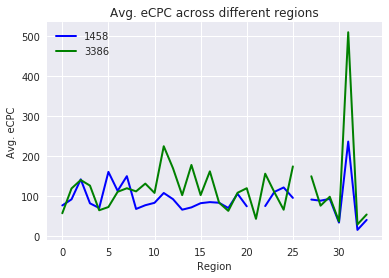

In [36]:
index = np.arange(len(x_region))

plt.plot(index, x_region[1458], marker='', color='blue', linewidth=2)
plt.plot(index, y_region[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.xticks(index, index_browser, fontsize=10, rotation = 30)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.title('Avg. eCPC across different regions')
plt.legend()

# Ad Exchange

In [37]:
ecpc_adex_click = df['click'].groupby([df['advertiser'],df['adexchange']])
ecpc_adex_click_sum = ecpc_adex_click.sum().unstack() 
ecpc_adex_click_sum = ecpc_adex_click_sum.fillna(0)
ecpc_adex_click_sum

adexchange,1,2,3,4,null
advertiser,,,,,
1458,134.0,115.0,136.0,0.0,0.0
2259,5.0,9.0,29.0,0.0,0.0
2261,12.0,14.0,10.0,0.0,0.0
2821,27.0,25.0,41.0,38.0,0.0
2997,0.0,0.0,0.0,0.0,217.0
3358,119.0,38.0,45.0,0.0,0.0
3386,141.0,78.0,101.0,0.0,0.0
3427,100.0,73.0,99.0,0.0,0.0
3476,50.0,34.0,103.0,0.0,0.0


In [38]:
ecpc_adex_payprice = df['payprice'].groupby([df['advertiser'],df['adexchange']])
ecpc_adex_payprice_sum = ecpc_adex_payprice.sum().unstack() 
ecpc_adex_payprice_sum = ecpc_adex_payprice_sum.fillna(0)
ecpc_adex_payprice_sum = ecpc_adex_payprice_sum/1000
ecpc_adex_payprice_sum

adexchange,1,2,3,4,null
advertiser,,,,,
1458,11328.253,11458.341,11182.142,0.00,0.000
2259,4275.718,3976.809,4175.711,0.00,0.000
2261,3334.018,3167.042,3372.719,0.00,0.000
2821,4819.753,4524.055,4730.376,4753.86,0.000
2997,0.000,0.000,0.000,0.00,3129.267
3358,12822.369,6346.416,3278.446,0.00,0.000
3386,11932.929,11782.658,11216.236,0.00,0.000
3427,9315.312,10586.157,10557.242,0.00,0.000
3476,7931.513,7439.010,8548.256,0.00,0.000


In [39]:
ecpc_adex = ecpc_adex_payprice_sum/ecpc_adex_click_sum
ecpc_adex = ecpc_adex.fillna(0)
x_adex = ecpc_adex.loc[[1458]].T
y_adex = ecpc_adex.loc[[3386]].T

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


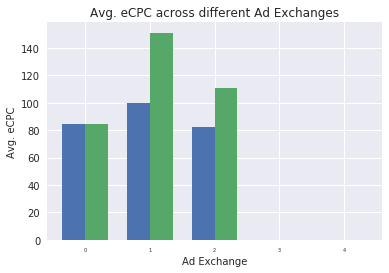

In [40]:
width = .35
index = np.arange(len(x_adex))
#index_browser = ['android_chrome','1','2','3','4','android_other','android_safari','7','8','ios_safari','10','11','12','13','14','15','16','17','18','19','20'
#                '21','22','23','24','25','26','27','28','windows_chrome','windows_firefox','windows_ie','32','33','34','35','36','37']
    
plt.bar(index,x_adex[1458],width)
plt.bar (index+width,y_adex[3386],width)
plt.xlabel('Ad Exchange', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.xticks(index+width/2, index, fontsize=5)
plt.title('Avg. eCPC across different Ad Exchanges')
plt.legend()
plt.show()

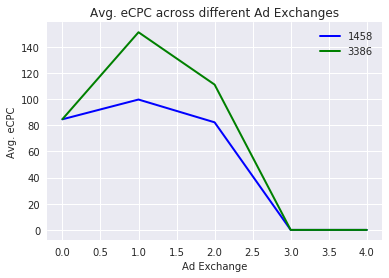

In [41]:
index = np.arange(len(x_adex))

plt.plot(index, x_adex[1458], marker='', color='blue', linewidth=2)
plt.plot(index, y_adex[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.xticks(index, index_browser, fontsize=10, rotation = 30)
plt.xlabel('Ad Exchange', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.title('Avg. eCPC across different Ad Exchanges')
plt.legend()

# Slot Visibility

In [44]:
ecpc_slv_click = df['click'].groupby([df['advertiser'],df['slotvisibility_with_num']])
ecpc_slv_click_sum = ecpc_slv_click.sum().unstack() 
ecpc_slv_click_sum = ecpc_slv_click_sum.fillna(0)
ecpc_slv_click_sum

slotvisibility_with_num,0,1,2,3,4,5
advertiser,,,,,,
1458,194.0,47.0,144.0,0.0,0.0,0.0
2259,38.0,4.0,0.0,1.0,0.0,0.0
2261,24.0,5.0,2.0,5.0,0.0,0.0
2821,69.0,47.0,9.0,2.0,4.0,0.0
2997,13.0,204.0,0.0,0.0,0.0,0.0
3358,96.0,63.0,43.0,0.0,0.0,0.0
3386,155.0,109.0,56.0,0.0,0.0,0.0
3427,139.0,80.0,53.0,0.0,0.0,0.0
3476,125.0,35.0,27.0,0.0,0.0,0.0


In [45]:
ecpc_slv_payprice = df['payprice'].groupby([df['advertiser'],df['slotvisibility_with_num']])
ecpc_slv_payprice_sum = ecpc_slv_payprice.sum().unstack() 
ecpc_slv_payprice_sum = ecpc_slv_payprice_sum.fillna(0)
ecpc_slv_payprice_sum = ecpc_slv_payprice_sum/1000
ecpc_slv_payprice_sum

slotvisibility_with_num,0,1,2,3,4,5
advertiser,,,,,,
1458,16923.227,4157.071,12888.438,0.000,0.000,0.000
2259,8972.804,1312.155,249.214,696.671,1145.691,51.703
2261,7964.639,1006.327,389.441,386.222,108.010,19.140
2821,10542.853,5219.713,1778.240,614.168,649.117,23.953
2997,397.745,2731.522,0.000,0.000,0.000,0.000
3358,9892.681,5285.725,7268.825,0.000,0.000,0.000
3386,18825.783,6849.386,9256.654,0.000,0.000,0.000
3427,17294.047,5107.253,8057.411,0.000,0.000,0.000
3476,12678.096,3631.875,7608.808,0.000,0.000,0.000


In [46]:
ecpc_slv = ecpc_slv_payprice_sum/ecpc_slv_click_sum
ecpc_slv = ecpc_slv.fillna(0)
x_slv = ecpc_slv.loc[[1458]].T
y_slv = ecpc_slv.loc[[3386]].T

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


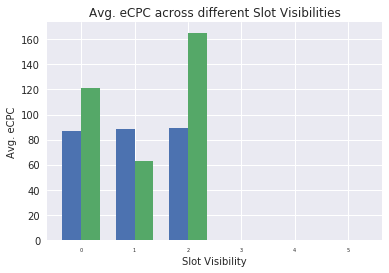

In [47]:
width = .35
index = np.arange(len(x_slv))
#index_browser = ['android_chrome','1','2','3','4','android_other','android_safari','7','8','ios_safari','10','11','12','13','14','15','16','17','18','19','20'
#                '21','22','23','24','25','26','27','28','windows_chrome','windows_firefox','windows_ie','32','33','34','35','36','37']
    
plt.bar(index,x_slv[1458],width)
plt.bar (index+width,y_slv[3386],width)
plt.xlabel('Slot Visibility', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.xticks(index+width/2, index, fontsize=5)
plt.title('Avg. eCPC across different Slot Visibilities')
plt.legend()
plt.show()

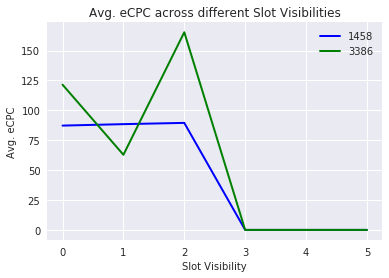

In [48]:
index = np.arange(len(x_slv))

plt.plot(index, x_slv[1458], marker='', color='blue', linewidth=2)
plt.plot(index, y_slv[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.xticks(index, index_browser, fontsize=10, rotation = 30)
plt.xlabel('Slot Visibility', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.title('Avg. eCPC across different Slot Visibilities')
plt.legend()

# Slot Size

In [52]:
ecpc_slotar_click = df['click'].groupby([df['advertiser'],df['slotarea']])
ecpc_slotar_click_sum = ecpc_slotar_click.sum().unstack() 
ecpc_slotar_click_sum = ecpc_slotar_click_sum.fillna(0)
ecpc_slotar_click_sum

slotarea,14040,15625,16000,27000,28080,28800,30000,37200,40000,57500,...,78400,81900,85500,86400,88200,90000,94080,96000,108000,180000
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,101.0,68.0,47.0,0.0,0.0
2259,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,16.0,2.0,0.0,0.0,0.0
2261,0.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,7.0,6.0,2.0,0.0,0.0
2821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,27.0,0.0,20.0,8.0,3.0,0.0,0.0
2997,0.0,0.0,217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,28.0,0.0,0.0,40.0,10.0,9.0,0.0,0.0
3386,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,78.0,20.0,10.0,0.0,0.0
3427,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,21.0,4.0,0.0,89.0,14.0,6.0,1.0,0.0
3476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,9.0,7.0,0.0,65.0,9.0,5.0,3.0,0.0


In [53]:
ecpc_slotar_payprice = df['payprice'].groupby([df['advertiser'],df['slotarea']])
ecpc_slotar_payprice_sum = ecpc_slotar_payprice.sum().unstack() 
ecpc_slotar_payprice_sum = ecpc_slotar_payprice_sum.fillna(0)
ecpc_slotar_payprice_sum = ecpc_slotar_payprice_sum/1000
ecpc_slotar_payprice_sum

slotarea,14040,15625,16000,27000,28080,28800,30000,37200,40000,57500,...,78400,81900,85500,86400,88200,90000,94080,96000,108000,180000
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,0.000,0.000,0.000,0.000,1345.410,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,508.772,0.000,8650.676,7306.620,3864.618,0.000,0.000
2259,2.064,1.654,0.000,1.501,271.034,83.187,167.057,0.000,362.240,0.000,...,0.000,0.633,386.162,181.545,0.000,2259.322,689.433,287.252,0.027,6.094
2261,6.044,1.531,0.000,2.801,0.000,119.180,162.010,280.207,563.441,37.006,...,61.801,0.000,720.009,94.854,647.797,1631.676,532.576,195.108,255.386,0.000
2821,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,643.480,2875.232,0.000,2632.426,1030.953,377.991,0.000,0.000
2997,0.000,0.000,3129.267,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3358,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,405.469,0.000,...,0.000,0.000,3310.822,70.638,0.000,2879.009,1461.179,1041.766,44.456,0.000
3386,0.000,0.000,0.000,0.000,1070.248,0.000,0.000,0.000,726.511,0.000,...,0.000,78.235,0.000,515.875,0.000,8060.899,1812.071,1456.824,0.000,0.000
3427,0.000,0.000,0.000,0.000,535.843,0.000,0.000,0.000,737.442,0.000,...,0.000,12.673,1909.608,476.314,0.000,8639.065,1587.372,1371.963,96.522,0.000
3476,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,554.060,0.000,...,0.000,0.000,1411.391,382.157,0.000,5257.936,2088.026,684.564,202.509,0.000


In [54]:
ecpc_slotar = ecpc_slotar_payprice_sum/ecpc_slotar_click_sum
ecpc_slotar = ecpc_slotar.fillna(0)
x_slotar = ecpc_slotar.loc[[1458]].T
y_slotar = ecpc_slotar.loc[[3386]].T

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


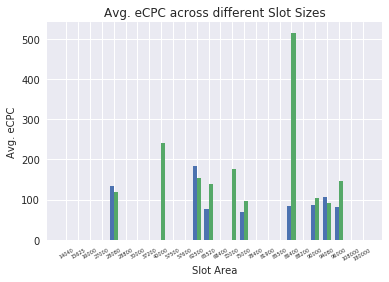

In [55]:
width = .35
index = np.arange(len(x_slotar))
#index_browser = ['android_chrome','1','2','3','4','android_other','android_safari','7','8','ios_safari','10','11','12','13','14','15','16','17','18','19','20'
#                '21','22','23','24','25','26','27','28','windows_chrome','windows_firefox','windows_ie','32','33','34','35','36','37']
    
plt.bar(index,x_slotar[1458],width)
plt.bar (index+width,y_slotar[3386],width)
plt.xlabel('Slot Area', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.xticks(index+width/2, index_slot, fontsize=5, rotation = 30)
plt.title('Avg. eCPC across different Slot Sizes')
plt.legend()
plt.show()

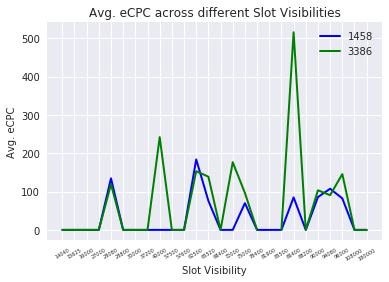

In [56]:
index = np.arange(len(x_slotar))

plt.plot(index, x_slotar[1458], marker='', color='blue', linewidth=2)
plt.plot(index, y_slotar[3386], marker='', color='green', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.xticks(index, index_slot, fontsize=5, rotation = 30)
plt.xlabel('Slot Visibility', fontsize=10)
plt.ylabel('Avg. eCPC', fontsize=10)
plt.title('Avg. eCPC across different Slot Visibilities')
plt.legend()

# Table

# Training Dataset

In [57]:
df

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag,slotvisibility_with_num,slotarea
0,0,5,22,windows_ie,2,2,2,200,200,2,0,5,238,5,3427,null,2,40000
1,0,1,20,windows_chrome,238,239,1,300,250,FourthView,Na,0,294,23,2821,null,4,75000
2,0,3,13,windows_ie,40,41,2,250,250,2,0,5,238,24,3427,"10052,10006,13866,10110",2,62500
3,0,6,23,windows_ie,1,1,1,160,600,2,1,0,300,25,1458,"13866,10063,10111",2,96000
4,0,5,6,windows_ie,216,233,2,728,90,OtherView,Na,133,277,133,2259,null,0,65520
5,0,4,17,windows_ie,276,277,1,336,280,2,1,0,300,123,1458,"10006,10077,10063,10057,10110",2,94080
6,0,3,12,windows_ie,80,89,3,1000,90,0,0,20,300,20,3386,"10083,10024,10063,13496,10093,10006,10057,10110",0,90000
7,0,3,16,windows_ie,15,19,1,160,600,2,1,0,300,134,1458,"10063,10024,13800,13866,10006,10111",2,96000
8,0,5,14,windows_ie,333,342,3,1000,90,0,0,70,300,70,1458,"10063,10006,10083,10110",0,90000
9,0,5,0,windows_chrome,2,2,3,1000,90,0,0,70,241,77,3358,"13403,10031,10063,10083,10006,10077,10075,10110",0,90000


In [62]:
df_imps = df['click'].groupby(df['advertiser'])
df_imps = df_imps.size().reset_index(name='counts')
df_imps

,advertiser,counts
0,1458,492353
1,2259,133673
2,2261,110122
3,2821,211366
4,2997,49829
5,3358,264956
6,3386,455041
7,3427,402806
8,3476,310835


In [65]:
df_metric = df['click'].groupby(df['advertiser'])
df_click = df_metric.sum()
df_click

advertiser
1458    385
2259     43
2261     36
2821    131
2997    217
3358    202
3386    320
3427    272
3476    187
Name: click, dtype: int64

In [66]:
df_ctr = df_metric.mean()
df_ctr

advertiser
1458    0.000782
2259    0.000322
2261    0.000327
2821    0.000620
2997    0.004355
3358    0.000762
3386    0.000703
3427    0.000675
3476    0.000602
Name: click, dtype: float64

In [68]:
df_metric2 = df['payprice'].groupby(df['advertiser'])
df_cost = df_metric2.sum()
df_cost = df_cost/1000
df_cost

advertiser
1458    33968.736
2259    12428.238
2261     9873.779
2821    18828.044
2997     3129.267
3358    22447.231
3386    34931.823
3427    30458.711
3476    23918.779
Name: payprice, dtype: float64

In [69]:
df_cpm = df_metric2.mean()
df_cpm

advertiser
1458    68.992646
2259    92.974931
2261    89.662184
2821    89.077922
2997    62.800116
3358    84.720599
3386    76.766320
3427    75.616329
3476    76.950083
Name: payprice, dtype: float64

In [70]:
df_ecpc = df_cost/df_click
df_ecpc

advertiser
1458     88.230483
2259    289.028791
2261    274.271639
2821    143.725527
2997     14.420585
3358    111.124906
3386    109.161947
3427    111.980555
3476    127.907909
dtype: float64

# Validation Dataset

In [83]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [87]:
test = pd.read_csv('validation.csv')
test = test.drop(['bidid','userid','slotid','IP','creative','keypage', 'domain','url','urlid'], axis = 1)
test.head()

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag
0,0,4,20,windows_ie,79,79,1,160,600,2,1,0,300,23,1458,"13866,10111"
1,0,1,21,windows_chrome,79,79,1,950,90,0,1,0,238,75,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,windows_ie,2,2,2,300,250,2,0,5,238,65,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,windows_chrome,201,205,2,336,280,2,0,5,238,6,3358,"13866,10057,10006,10063,10110"
4,0,1,18,windows_chrome,134,135,2,200,200,1,0,5,249,5,3476,"10006,10063,13776,10110"


In [88]:
test_imps = test['click'].groupby(test['advertiser'])
test_imps = test_imps.size().reset_index(name='counts')
test_imps

,advertiser,counts
0,1458,62353
1,2259,16715
2,2261,13550
3,2821,26503
4,2997,6176
5,3358,32939
6,3386,56665
7,3427,50183
8,3476,38841


In [89]:
test_metric = test['click'].groupby(test['advertiser'])
test_click = test_metric.sum()
test_click

advertiser
1458    49
2259     2
2261     3
2821    23
2997    26
3358    23
3386    28
3427    37
3476    11
Name: click, dtype: int64

In [90]:
test_ctr = test_metric.mean()
test_ctr

advertiser
1458    0.000786
2259    0.000120
2261    0.000221
2821    0.000868
2997    0.004210
3358    0.000698
3386    0.000494
3427    0.000737
3476    0.000283
Name: click, dtype: float64

In [91]:
test_metric2 = test['payprice'].groupby(test['advertiser'])
test_cost = test_metric2.sum()
test_cost = test_cost/1000
test_cost

advertiser
1458    4294.602
2259    1568.808
2261    1214.876
2821    2394.900
2997     388.784
3358    2794.021
3386    4350.793
3427    3776.735
3476    2993.751
Name: payprice, dtype: float64

In [92]:
test_cpm = test_metric2.mean()
test_cpm

advertiser
1458    68.875627
2259    93.856297
2261    89.658745
2821    90.363355
2997    62.950777
3358    84.824099
3386    76.780958
3427    75.259251
3476    77.077083
Name: payprice, dtype: float64

In [93]:
test_ecpc = test_cost/test_click
test_ecpc

advertiser
1458     87.644939
2259    784.404000
2261    404.958667
2821    104.126087
2997     14.953231
3358    121.479174
3386    155.385464
3427    102.073919
3476    272.159182
dtype: float64

# Q2

In [11]:
df

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag,slotvisibility_with_num,slotarea
0,0,5,22,windows_ie,2,2,2,200,200,2,0,5,238,5,3427,null,2,40000
1,0,1,20,windows_chrome,238,239,1,300,250,FourthView,Na,0,294,23,2821,null,4,75000
2,0,3,13,windows_ie,40,41,2,250,250,2,0,5,238,24,3427,"10052,10006,13866,10110",2,62500
3,0,6,23,windows_ie,1,1,1,160,600,2,1,0,300,25,1458,"13866,10063,10111",2,96000
4,0,5,6,windows_ie,216,233,2,728,90,OtherView,Na,133,277,133,2259,null,0,65520
5,0,4,17,windows_ie,276,277,1,336,280,2,1,0,300,123,1458,"10006,10077,10063,10057,10110",2,94080
6,0,3,12,windows_ie,80,89,3,1000,90,0,0,20,300,20,3386,"10083,10024,10063,13496,10093,10006,10057,10110",0,90000
7,0,3,16,windows_ie,15,19,1,160,600,2,1,0,300,134,1458,"10063,10024,13800,13866,10006,10111",2,96000
8,0,5,14,windows_ie,333,342,3,1000,90,0,0,70,300,70,1458,"10063,10006,10083,10110",0,90000
9,0,5,0,windows_chrome,2,2,3,1000,90,0,0,70,241,77,3358,"13403,10031,10063,10083,10006,10077,10075,10110",0,90000


In [15]:
df['useragent'].unique()

array(['windows_ie', 'windows_chrome', 'mac_other', 'windows_other',
       'android_safari', 'mac_safari', 'windows_maxthon',
       'windows_firefox', 'mac_chrome', 'linux_firefox', 'windows_opera',
       'windows_theworld', 'android_other', 'windows_safari',
       'ios_safari', 'linux_other', 'mac_firefox', 'android_opera',
       'mac_maxthon', 'other_other', 'android_chrome', 'linux_chrome',
       'other_opera', 'linux_safari', 'other_ie', 'ios_other',
       'linux_opera', 'android_sogou', 'other_safari', 'windows_sogou',
       'mac_opera', 'mac_sogou', 'android_maxthon', 'android_firefox',
       'linux_ie', 'other_chrome', 'android_ie', 'other_firefox'],
      dtype=object)

In [25]:
df['os'], df['browser'] = df['useragent'].str.split('_',1).str

In [26]:
df

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag,slotvisibility_with_num,slotarea,os,browser
0,0,5,22,windows_ie,2,2,2,200,200,2,0,5,238,5,3427,null,2,40000,windows,ie
1,0,1,20,windows_chrome,238,239,1,300,250,FourthView,Na,0,294,23,2821,null,4,75000,windows,chrome
2,0,3,13,windows_ie,40,41,2,250,250,2,0,5,238,24,3427,"10052,10006,13866,10110",2,62500,windows,ie
3,0,6,23,windows_ie,1,1,1,160,600,2,1,0,300,25,1458,"13866,10063,10111",2,96000,windows,ie
4,0,5,6,windows_ie,216,233,2,728,90,OtherView,Na,133,277,133,2259,null,0,65520,windows,ie
5,0,4,17,windows_ie,276,277,1,336,280,2,1,0,300,123,1458,"10006,10077,10063,10057,10110",2,94080,windows,ie
6,0,3,12,windows_ie,80,89,3,1000,90,0,0,20,300,20,3386,"10083,10024,10063,13496,10093,10006,10057,10110",0,90000,windows,ie
7,0,3,16,windows_ie,15,19,1,160,600,2,1,0,300,134,1458,"10063,10024,13800,13866,10006,10111",2,96000,windows,ie
8,0,5,14,windows_ie,333,342,3,1000,90,0,0,70,300,70,1458,"10063,10006,10083,10110",0,90000,windows,ie
9,0,5,0,windows_chrome,2,2,3,1000,90,0,0,70,241,77,3358,"13403,10031,10063,10083,10006,10077,10075,10110",0,90000,windows,chrome


In [27]:
df_test = pd.read_csv('test.csv')

In [29]:
df_test.head(10)

,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,...,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,75045dd2f2136c93fe55fe6c446ec1527ed8f0bb,windows_chrome,27.197.36.*,146,159,3,DDTSQuf0MTTNaqKIvMpENpn,...,Astro_F_Rectangle,300,250,0,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304..."
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,11279eb1f8f7a88f877db911673522b6ff202aa7,android_safari,124.126.227.*,1,1,null,d63d96468f66986d5a8eb5225ad0b6f0,...,2745306850,320,50,FirstView,Na,5,11908,null,2997,null
2,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,4771a819a3f5b86776d8a9456f4f2506578f78d8,windows_ie,116.116.104.*,27,34,1,trqRTJkrBoq7JsNr5SqfNX,...,mm_34022157_3445226_11175100,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008..."
3,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,5360671379f3204afa9cc0edd8fd2e2096cb09eb,windows_ie,115.46.145.*,238,245,4,6d27caf5a202ec085f80af7163ef7cb0,...,210842,960,90,FirstView,Na,30,10717,null,2821,"10075,13042,10006,10110,13776,10031,10063"
4,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,d791b5f6306b9d299f81daa5448ced7e5bfa010f,windows_ie,221.199.203.*,27,35,3,3FKElpuEMusyJqKbuKz,...,Fashion_F_Rectangle,300,250,0,0,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063
5,0,19,7493c42f6d8f29d9f414b75c125ce3db40461ef9,aed0d83d9e06589a23e5f02a3e93389f815effc5,windows_ie,122.141.136.*,55,60,3,31xSTvprdN1RFt,...,Ent_F_Upright,300,250,0,0,50,a499988a822facd86dd0e8e4ffef8532,bebefa5efe83beee17a3d245e7c5085b,1458,"13496,10093,10057,13866,10063,10110"
6,4,15,819fb6958ea48b10430710d009c57d55a31debcb,1ff9310f6ba827e47af5a7021953a4b9116a6a40,windows_chrome,175.146.224.*,40,48,3,ersbQv1RdoTy1m58uG,...,ALLINONE_F_Width1,1000,90,0,0,70,c46090c887c257b61ab1fa11baee91d8,0f951a030abdaedd733ee8d114ce2944,3427,null
7,0,0,8660774f6c94e32dfbd46add8a9bc94df3c74130,9a69166c6c091acd1e3fca35f661104a0f756883,windows_ie,202.104.177.*,216,233,1,trqRTu1ojqN-gMKzwFnWvpdh,...,mm_10028331_120124_10852228,728,90,1,1,0,48f2e9ba15708c0146bda5e1dd653caa,bebefa5efe83beee17a3d245e7c5085b,1458,null
8,4,8,ccc4c75ae4fd33526e5ecdae482c45c1dabc94db,30f29e6da56d60e1a70922cf310df9a01a8c35e3,windows_ie,183.92.64.*,183,186,3,ersbQv1RdoTy1m58uG,...,ALLINONE_F_Width1,1000,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,d29e59bf0f7f8243858b8183f14d4412,3358,"10063,10031,10083,10110"
9,1,10,d9a212303746d85553966e902a315ba8812dd138,413efa29cacb96550cc04c2df62e65f72f872812,windows_ie,36.40.65.*,333,334,2,trqRTud0B9c7gspy5SqW,...,2069535511,468,60,2,0,5,2f88fc9cf0141b5bbaf251cab07f4ce7,361e128affece850342293213691a043,3386,"10048,10052,13042,10059,10093,11944,10031,1340..."


In [11]:
df_valid = pd.read_csv('validation.csv')
df_valid.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [8]:
df.head(50)

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag
0,0,5,22,windows_ie,2,2,2,200,200,2,0,5,238,5,3427,null
1,0,1,20,windows_chrome,238,239,1,300,250,FourthView,Na,0,294,23,2821,null
2,0,3,13,windows_ie,40,41,2,250,250,2,0,5,238,24,3427,"10052,10006,13866,10110"
3,0,6,23,windows_ie,1,1,1,160,600,2,1,0,300,25,1458,"13866,10063,10111"
4,0,5,6,windows_ie,216,233,2,728,90,OtherView,Na,133,277,133,2259,null
5,0,4,17,windows_ie,276,277,1,336,280,2,1,0,300,123,1458,"10006,10077,10063,10057,10110"
6,0,3,12,windows_ie,80,89,3,1000,90,0,0,20,300,20,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,windows_ie,15,19,1,160,600,2,1,0,300,134,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,windows_ie,333,342,3,1000,90,0,0,70,300,70,1458,"10063,10006,10083,10110"
9,0,5,0,windows_chrome,2,2,3,1000,90,0,0,70,241,77,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [31]:
a = df.payprice.value_counts()
a

70     141942
50     109782
20     108131
77      77936
80      69089
55      62668
5       45131
31      43491
88      41174
52      40326
73      40005
22      36707
84      30421
21      30269
30      26681
76      22810
160     21419
10      21235
40      19969
51      19556
89      19349
17      19275
101     18065
18      17904
60      17716
16      17635
33      17379
11      16934
59      16086
42      15984
        ...  
257       643
272       643
239       624
267       616
254       616
264       615
245       615
292       608
276       600
249       598
288       574
269       573
277       572
263       561
291       546
284       530
282       523
0         487
287       479
273       472
295       467
278       459
290       457
285       445
294       424
279       404
299       290
298       276
296       239
297       171
Name: payprice, Length: 301, dtype: int64

In [35]:
sum = 0
exp = a.index*a[a.index]
for i in range(0,len(exp)):
    sum = sum + exp[i]
    
exp_value_payprice = sum/len(df)
exp_value_payprice

78.15141623895867

In [36]:
mean_payprice = df.payprice.mean()
mean_payprice

78.15141623895867

In [9]:
q2 = df.bidprice.value_counts()
q2

300    947394
294    322009
238    313445
227    235767
241    204893
277    182981
254    118845
249    105647
Name: bidprice, dtype: int64

In [10]:
expected_value_train = (q2[300]*300 + q2[294]*294 + q2[238]*238 + q2[227]*227 + q2[241]*241 + q2[277]*277 + q2[254]*254 + 
                 q2[249]*249)/len(df)
expected_value_train

272.9620461862927

In [12]:
q2_valid = df_valid.bidprice.value_counts()
q2_valid

300    119018
294     40077
238     38996
227     29285
241     25575
277     22867
254     14901
249     13206
Name: bidprice, dtype: int64

In [13]:
expected_value_valid = (q2_valid[300]*300 + q2_valid[294]*294 + q2_valid[238]*238 + q2_valid[227]*227 + 
                        q2_valid[241]*241 + q2_valid[277]*277 + q2_valid[254]*254 + q2_valid[249]*249)/len(df_valid)
expected_value_valid

273.0530986263058

In [14]:
df_valid.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [15]:
df_valid = df_valid.drop(['bidid','userid','slotid','IP','creative','keypage', 'domain','url','urlid'], axis = 1)
df_valid.head()

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag
0,0,4,20,windows_ie,79,79,1,160,600,2,1,0,300,23,1458,"13866,10111"
1,0,1,21,windows_chrome,79,79,1,950,90,0,1,0,238,75,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,windows_ie,2,2,2,300,250,2,0,5,238,65,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,windows_chrome,201,205,2,336,280,2,0,5,238,6,3358,"13866,10057,10006,10063,10110"
4,0,1,18,windows_chrome,134,135,2,200,200,1,0,5,249,5,3476,"10006,10063,13776,10110"


In [16]:
df_valid['constant_bidprice'] = expected_value_train
df_valid.head()

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag,constant_bidprice
0,0,4,20,windows_ie,79,79,1,160,600,2,1,0,300,23,1458,"13866,10111",272.962046
1,0,1,21,windows_chrome,79,79,1,950,90,0,1,0,238,75,3476,"10075,10057,10024,10052,10083,10063,10006,10110",272.962046
2,0,4,8,windows_ie,2,2,2,300,250,2,0,5,238,65,3358,"13866,10024,10059,10063,13776,10083,10006,10111",272.962046
3,0,5,15,windows_chrome,201,205,2,336,280,2,0,5,238,6,3358,"13866,10057,10006,10063,10110",272.962046
4,0,1,18,windows_chrome,134,135,2,200,200,1,0,5,249,5,3476,"10006,10063,13776,10110",272.962046


In [17]:
df_valid['payprice'].loc[0]

23

In [18]:
budget = 6250*1000
df_valid['win'] = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'constant_bidprice'] > df_valid.loc[i,'payprice'] and budget > df_valid.loc[i,'payprice']):
        df_valid.loc[i,'win'] = 1
        budget = budget - df_valid.loc[i,'payprice']
    else:
        df_valid.loc[i,'win'] = 0

In [19]:
df_valid.head()

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag,constant_bidprice,win
0,0,4,20,windows_ie,79,79,1,160,600,2,1,0,300,23,1458,"13866,10111",272.962046,1
1,0,1,21,windows_chrome,79,79,1,950,90,0,1,0,238,75,3476,"10075,10057,10024,10052,10083,10063,10006,10110",272.962046,1
2,0,4,8,windows_ie,2,2,2,300,250,2,0,5,238,65,3358,"13866,10024,10059,10063,13776,10083,10006,10111",272.962046,1
3,0,5,15,windows_chrome,201,205,2,336,280,2,0,5,238,6,3358,"13866,10057,10006,10063,10110",272.962046,1
4,0,1,18,windows_chrome,134,135,2,200,200,1,0,5,249,5,3476,"10006,10063,13776,10110",272.962046,1


In [20]:
count = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'win'] == 1 and df_valid.loc[i,'click'] == 1):
        count = count + 1
    else:
        continue

In [73]:
a = df_valid.win.sum()
print(a)
print(len(df_valid))

81686
303925


In [74]:
print('Constant Bid Strategy(Mean Bid Price) Statistics')
print()
print('Clicks: ', count)
print('Avg CTR: ', count/a)
print('Avg CPC: ', 6250/count)

Constant Bid Strategy(Mean Bid Price) Statistics

Clicks:  52
Avg CTR:  0.0006365839923609921
Avg CPC:  120.1923076923077


In [38]:
df.payprice.describe()

count    2.430981e+06
mean     7.815142e+01
std      5.984636e+01
min      0.000000e+00
25%      3.300000e+01
50%      6.800000e+01
75%      9.900000e+01
max      3.000000e+02
Name: payprice, dtype: float64

In [37]:
df_valid['constant_bidprice_2'] = mean_payprice
df_valid.head()

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag,constant_bidprice,win,constant_bidprice_2
0,0,4,20,windows_ie,79,79,1,160,600,2,1,0,300,23,1458,"13866,10111",272.962046,1,78.151416
1,0,1,21,windows_chrome,79,79,1,950,90,0,1,0,238,75,3476,"10075,10057,10024,10052,10083,10063,10006,10110",272.962046,1,78.151416
2,0,4,8,windows_ie,2,2,2,300,250,2,0,5,238,65,3358,"13866,10024,10059,10063,13776,10083,10006,10111",272.962046,1,78.151416
3,0,5,15,windows_chrome,201,205,2,336,280,2,0,5,238,6,3358,"13866,10057,10006,10063,10110",272.962046,1,78.151416
4,0,1,18,windows_chrome,134,135,2,200,200,1,0,5,249,5,3476,"10006,10063,13776,10110",272.962046,1,78.151416


In [40]:
budget = 6250*1000
df_valid['win_2'] = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'constant_bidprice_2'] > df_valid.loc[i,'payprice'] and budget > df_valid.loc[i,'payprice']):
        df_valid.loc[i,'win_2'] = 1
        budget = budget - df_valid.loc[i,'payprice']
    else:
        df_valid.loc[i,'win_2'] = 0

In [41]:
count2 = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'win_2'] == 1 and df_valid.loc[i,'click'] == 1):
        count2 = count2 + 1
    else:
        continue

In [75]:
b = df_valid.win_2.sum()
print(b)
print(len(df_valid))

146338
303925


In [76]:
print('Constant Bid Strategy(Mean Pay Price) Statistics')
print()
print('Clicks: ', count2)
print('Avg CTR: ', count2/b)
print('Avg CPC: ', 6250/count2)

Constant Bid Strategy(Mean Pay Price) Statistics

Clicks:  67
Avg CTR:  0.0004578441689786658
Avg CPC:  93.28358208955224


In [43]:
df.bidprice.describe()

count    2.430981e+06
mean     2.729620e+02
std      2.891153e+01
min      2.270000e+02
25%      2.410000e+02
50%      2.940000e+02
75%      3.000000e+02
max      3.000000e+02
Name: bidprice, dtype: float64

In [46]:
df_valid = df_valid.drop(['constant_bidprice_3', 'constant_bidprice_4'], axis = 1) 
df_valid.head()

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,bidprice,payprice,advertiser,usertag,constant_bidprice,win,constant_bidprice_2,win_2
0,0,4,20,windows_ie,79,79,1,160,600,2,1,0,300,23,1458,"13866,10111",272.962046,1,78.151416,1
1,0,1,21,windows_chrome,79,79,1,950,90,0,1,0,238,75,3476,"10075,10057,10024,10052,10083,10063,10006,10110",272.962046,1,78.151416,1
2,0,4,8,windows_ie,2,2,2,300,250,2,0,5,238,65,3358,"13866,10024,10059,10063,13776,10083,10006,10111",272.962046,1,78.151416,1
3,0,5,15,windows_chrome,201,205,2,336,280,2,0,5,238,6,3358,"13866,10057,10006,10063,10110",272.962046,1,78.151416,1
4,0,1,18,windows_chrome,134,135,2,200,200,1,0,5,249,5,3476,"10006,10063,13776,10110",272.962046,1,78.151416,1


In [47]:
df_valid['random_bidprice'] = np.random.randint(244,302, size=len(df_valid))
df_valid['random_bidprice_2'] = np.random.randint(18,138, size=len(df_valid))
df_valid.head(10)

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,...,bidprice,payprice,advertiser,usertag,constant_bidprice,win,constant_bidprice_2,win_2,random_bidprice,random_bidprice_2
0,0,4,20,windows_ie,79,79,1,160,600,2,...,300,23,1458,"13866,10111",272.962046,1,78.151416,1,256,38
1,0,1,21,windows_chrome,79,79,1,950,90,0,...,238,75,3476,"10075,10057,10024,10052,10083,10063,10006,10110",272.962046,1,78.151416,1,288,41
2,0,4,8,windows_ie,2,2,2,300,250,2,...,238,65,3358,"13866,10024,10059,10063,13776,10083,10006,10111",272.962046,1,78.151416,1,269,127
3,0,5,15,windows_chrome,201,205,2,336,280,2,...,238,6,3358,"13866,10057,10006,10063,10110",272.962046,1,78.151416,1,292,65
4,0,1,18,windows_chrome,134,135,2,200,200,1,...,249,5,3476,"10006,10063,13776,10110",272.962046,1,78.151416,1,270,53
5,0,6,1,windows_ie,3,3,3,960,90,0,...,241,22,3427,"10063,10111",272.962046,1,78.151416,1,269,94
6,0,0,18,windows_ie,94,97,1,336,280,0,...,227,31,3358,"10006,10110",272.962046,1,78.151416,1,244,65
7,0,6,21,windows_ie,238,239,1,300,250,2,...,227,20,3427,null,272.962046,1,78.151416,1,287,73
8,0,0,11,windows_chrome,80,84,2,336,280,2,...,249,58,3476,"10057,10063,10006,10059,10110",272.962046,1,78.151416,1,290,106
9,0,5,15,windows_ie,65,73,3,1000,90,0,...,241,55,3358,"10048,10059,10006,13403,10063,10031,10111",272.962046,1,78.151416,1,282,90


In [48]:
budget = 6250*1000
df_valid['win_3'] = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'random_bidprice'] > df_valid.loc[i,'payprice'] and budget > df_valid.loc[i,'payprice']):
        df_valid.loc[i,'win_3'] = 1
        budget = budget - df_valid.loc[i,'payprice']
    else:
        df_valid.loc[i,'win_3'] = 0

In [49]:
count3 = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'win_3'] == 1 and df_valid.loc[i,'click'] == 1):
        count3 = count3 + 1
    else:
        continue

In [77]:
c = df_valid.win_3.sum()
print(c)
print(len(df_valid))

81661
303925


In [78]:
print('Random Bid Strategy(Mean +/- St. Dev. Bid Price) Statistics')
print()
print('Clicks: ', count3)
print('Avg CTR: ', count3/c)
print('Avg CPC: ', 6250/count3)

Random Bid Strategy(Mean +/- St. Dev. Bid Price) Statistics

Clicks:  52
Avg CTR:  0.000636778878534429
Avg CPC:  120.1923076923077


In [51]:
budget = 6250*1000
df_valid['win_4'] = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'random_bidprice_2'] > df_valid.loc[i,'payprice'] and budget > df_valid.loc[i,'payprice']):
        df_valid.loc[i,'win_4'] = 1
        budget = budget - df_valid.loc[i,'payprice']
    else:
        df_valid.loc[i,'win_4'] = 0

In [52]:
count4 = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'win_4'] == 1 and df_valid.loc[i,'click'] == 1):
        count4 = count4 + 1
    else:
        continue

In [79]:
d = df_valid.win_4.sum()
print(d)
print(len(df_valid))

142918
303925


In [80]:
print('Random Bid Strategy(Mean +/- St. Dev. Pay Price) Statistics')
print()
print('Clicks: ', count4)
print('Avg CTR: ', count4/d)
print('Avg CPC: ', 6250/count4)

Random Bid Strategy(Mean +/- St. Dev. Pay Price) Statistics

Clicks:  58
Avg CTR:  0.000405827117647882
Avg CPC:  107.75862068965517


In [54]:
df_valid['random_bidprice_3'] = np.random.randint(215,360, size=len(df_valid))
df_valid['random_bidprice_4'] = np.random.randint(18,198, size=len(df_valid))
df_valid.head(10)

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,...,constant_bidprice,win,constant_bidprice_2,win_2,random_bidprice,random_bidprice_2,win_3,win_4,random_bidprice_3,random_bidprice_4
0,0,4,20,windows_ie,79,79,1,160,600,2,...,272.962046,1,78.151416,1,256,38,1,1,313,85
1,0,1,21,windows_chrome,79,79,1,950,90,0,...,272.962046,1,78.151416,1,288,41,1,0,240,110
2,0,4,8,windows_ie,2,2,2,300,250,2,...,272.962046,1,78.151416,1,269,127,1,1,276,171
3,0,5,15,windows_chrome,201,205,2,336,280,2,...,272.962046,1,78.151416,1,292,65,1,1,328,18
4,0,1,18,windows_chrome,134,135,2,200,200,1,...,272.962046,1,78.151416,1,270,53,1,1,216,47
5,0,6,1,windows_ie,3,3,3,960,90,0,...,272.962046,1,78.151416,1,269,94,1,1,307,193
6,0,0,18,windows_ie,94,97,1,336,280,0,...,272.962046,1,78.151416,1,244,65,1,1,355,73
7,0,6,21,windows_ie,238,239,1,300,250,2,...,272.962046,1,78.151416,1,287,73,1,1,279,131
8,0,0,11,windows_chrome,80,84,2,336,280,2,...,272.962046,1,78.151416,1,290,106,1,1,354,178
9,0,5,15,windows_ie,65,73,3,1000,90,0,...,272.962046,1,78.151416,1,282,90,1,1,322,36


In [55]:
budget = 6250*1000
df_valid['win_5'] = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'random_bidprice_3'] > df_valid.loc[i,'payprice'] and budget > df_valid.loc[i,'payprice']):
        df_valid.loc[i,'win_5'] = 1
        budget = budget - df_valid.loc[i,'payprice']
    else:
        df_valid.loc[i,'win_5'] = 0

In [56]:
count5 = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'win_5'] == 1 and df_valid.loc[i,'click'] == 1):
        count5 = count5 + 1
    else:
        continue

In [81]:
e = df_valid.win_5.sum()
print(e)
print(len(df_valid))

81671
303925


In [82]:
print('Random Bid Strategy(Mean +/- 2 St. Dev. Bid Price) Statistics')
print()
print('Clicks: ', count5)
print('Avg CTR: ', count5/e)
print('Avg CPC: ', 6250/count5)

Random Bid Strategy(Mean +/- 2 St. Dev. Bid Price) Statistics

Clicks:  52
Avg CTR:  0.0006367009097476461
Avg CPC:  120.1923076923077


In [58]:
budget = 6250*1000
df_valid['win_6'] = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'random_bidprice_4'] > df_valid.loc[i,'payprice'] and budget > df_valid.loc[i,'payprice']):
        df_valid.loc[i,'win_6'] = 1
        budget = budget - df_valid.loc[i,'payprice']
    else:
        df_valid.loc[i,'win_6'] = 0

In [59]:
count6 = 0

for i in range(0,len(df_valid)):
    if(df_valid.loc[i,'win_6'] == 1 and df_valid.loc[i,'click'] == 1):
        count6 = count6 + 1
    else:
        continue

In [83]:
f = df_valid.win_6.sum()
print(f)
print(len(df_valid))

120322
303925


In [84]:
print('Random Bid Strategy(Mean +/- 2 St. Dev. Pay Price) Statistics')
print()
print('Clicks: ', count6)
print('Avg CTR: ', count6/f)
print('Avg CPC: ', 6250/count6)

Random Bid Strategy(Mean +/- 2 St. Dev. Pay Price) Statistics

Clicks:  52
Avg CTR:  0.0004321736673260085
Avg CPC:  120.1923076923077


# Q3

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null


In [64]:
train.domain.nunique()

23013

In [65]:
train.creative.nunique()

131

In [66]:
train.keypage.nunique()

19

In [67]:
train.slotformat.unique()

array(['0', 'Na', '1', '5'], dtype=object)

In [68]:
train.url.nunique()

763961

In [4]:
#df = pd.concat([train, validate])
df = train
df.head(20)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [ ]:
print(len(train))
print(len(validate))

In [5]:
df = df.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)

In [6]:
df.fillna(0)
df.head(10)

,click,weekday,hour,useragent,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,windows_ie,2,2,2,trqRTvKaXTKfgg24JKTI,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,windows_chrome,238,239,1,20fc675468712705dbf5d3eda94126da,300,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,windows_ie,40,41,2,trqRTJn7O95I1mKYUV,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,windows_ie,1,1,1,5F97t5E0BTK7XhNrUMpENpn,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,windows_ie,216,233,2,13625cb070ffb306b425cd803c4b7ab4,728,90,OtherView,Na,133,7330,277,133,null,2259,null
5,0,4,17,windows_ie,276,277,1,trqRTuxoGQdcFNKbuKz,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,windows_ie,80,89,3,3FKElpuEMusyJqKbuKz,1000,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,windows_ie,15,19,1,trqRTvp8gIc7gspy,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,windows_ie,333,342,3,ersbQv1RdoTy1m58uG,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,windows_chrome,2,2,3,ersbQv1RdoTy1m58uG,1000,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [7]:
df['usertag'] = df['usertag'].fillna(0)

In [12]:
df['usertag'].nunique()

824721

In [ ]:
df_ut = df['usertag'].apply(frozenset).to_frame(name='usertag')
for usertag in frozenset.union(*df_ut.usertag):
    df_ut[usertag] = df.apply(lambda _: int(usertag in _.usertag), axis=1)

In [7]:
df['os'], df['browser'] = df['useragent'].str.split('_',1).str
df['slotarea'] = df['slotwidth']*df['slotheight']
df = df.drop('useragent', axis = 1)
df.head(10)

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea
0,0,5,22,2,2,2,trqRTvKaXTKfgg24JKTI,200,200,2,...,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,40000
1,0,1,20,238,239,1,20fc675468712705dbf5d3eda94126da,300,250,FourthView,...,0,10722,294,23,null,2821,null,windows,chrome,75000
2,0,3,13,40,41,2,trqRTJn7O95I1mKYUV,250,250,2,...,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,62500
3,0,6,23,1,1,1,5F97t5E0BTK7XhNrUMpENpn,160,600,2,...,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,96000
4,0,5,6,216,233,2,13625cb070ffb306b425cd803c4b7ab4,728,90,OtherView,...,133,7330,277,133,null,2259,null,windows,ie,65520
5,0,4,17,276,277,1,trqRTuxoGQdcFNKbuKz,336,280,2,...,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110",windows,ie,94080
6,0,3,12,80,89,3,3FKElpuEMusyJqKbuKz,1000,90,0,...,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110",windows,ie,90000
7,0,3,16,15,19,1,trqRTvp8gIc7gspy,160,600,2,...,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111",windows,ie,96000
8,0,5,14,333,342,3,ersbQv1RdoTy1m58uG,1000,90,0,...,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110",windows,ie,90000
9,0,5,0,2,2,3,ersbQv1RdoTy1m58uG,1000,90,0,...,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110",windows,chrome,90000


In [9]:
df['slotvisibility'] = df['slotvisibility'].apply(text_to_numeric)

In [16]:
df.slotformat.unique()

array(['0', 'Na', '1', '5'], dtype=object)

In [112]:
def text_to_numeric(x):
    if x=='FirstView' or x=='1':
        return 1
    if x=='SecondView' or x=='2':
        return 2
    if x=='ThirdView':
        return 3
    if x=='FourthView':
        return 4
    if x=='FifthView':
        return 5
    if x=='OtherView' or x=='255' or x=='0' or x=='Na':
        return 0
    else:
        return x

In [113]:
def text_to_numeric_2(x):
    if x=='1':
        return 1
    if x=='5':
        return 5
    if x=='0' or x=='Na':
        return 0
    else:
        return x

In [11]:
df['slotformat'] = df['slotformat'].apply(text_to_numeric_2)
df.head(10)

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea
0,0,5,22,2,2,2,trqRTvKaXTKfgg24JKTI,200,200,2,...,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,40000
1,0,1,20,238,239,1,20fc675468712705dbf5d3eda94126da,300,250,4,...,0,10722,294,23,null,2821,null,windows,chrome,75000
2,0,3,13,40,41,2,trqRTJn7O95I1mKYUV,250,250,2,...,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,62500
3,0,6,23,1,1,1,5F97t5E0BTK7XhNrUMpENpn,160,600,2,...,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,96000
4,0,5,6,216,233,2,13625cb070ffb306b425cd803c4b7ab4,728,90,0,...,133,7330,277,133,null,2259,null,windows,ie,65520
5,0,4,17,276,277,1,trqRTuxoGQdcFNKbuKz,336,280,2,...,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110",windows,ie,94080
6,0,3,12,80,89,3,3FKElpuEMusyJqKbuKz,1000,90,0,...,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110",windows,ie,90000
7,0,3,16,15,19,1,trqRTvp8gIc7gspy,160,600,2,...,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111",windows,ie,96000
8,0,5,14,333,342,3,ersbQv1RdoTy1m58uG,1000,90,0,...,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110",windows,ie,90000
9,0,5,0,2,2,3,ersbQv1RdoTy1m58uG,1000,90,0,...,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110",windows,chrome,90000


In [12]:
label = df['click']

In [13]:
df = df.drop(['click', 'bidprice', 'payprice' ], axis = 1)
df.head(10)

,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag,os,browser,slotarea
0,5,22,2,2,2,trqRTvKaXTKfgg24JKTI,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,40000
1,1,20,238,239,1,20fc675468712705dbf5d3eda94126da,300,250,4,0,0,10722,null,2821,null,windows,chrome,75000
2,3,13,40,41,2,trqRTJn7O95I1mKYUV,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,62500
3,6,23,1,1,1,5F97t5E0BTK7XhNrUMpENpn,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,96000
4,5,6,216,233,2,13625cb070ffb306b425cd803c4b7ab4,728,90,0,0,133,7330,null,2259,null,windows,ie,65520
5,4,17,276,277,1,trqRTuxoGQdcFNKbuKz,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110",windows,ie,94080
6,3,12,80,89,3,3FKElpuEMusyJqKbuKz,1000,90,0,0,20,86c2543527c86a893d4d4f68810a0416,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110",windows,ie,90000
7,3,16,15,19,1,trqRTvp8gIc7gspy,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111",windows,ie,96000
8,5,14,333,342,3,ersbQv1RdoTy1m58uG,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110",windows,ie,90000
9,5,0,2,2,3,ersbQv1RdoTy1m58uG,1000,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110",windows,chrome,90000


In [114]:
def standardize(df, numeric_only=True):
    
    # subtracy mean and divide by std
    df = (df - df.mean()) / df.std()
    
    return df

In [15]:
df['slotprice'] = standardize(df['slotprice'])
df['slotarea'] = standardize(df['slotarea'])
df.head(10)

,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag,os,browser,slotarea
0,5,22,2,2,2,trqRTvKaXTKfgg24JKTI,200,200,2,0,-0.586264,a4f763f78ef3eedfe614263b94a8924e,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,-2.142994
1,1,20,238,239,1,20fc675468712705dbf5d3eda94126da,300,250,4,0,-0.721237,10722,null,2821,null,windows,chrome,-0.115765
2,3,13,40,41,2,trqRTJn7O95I1mKYUV,250,250,2,0,-0.586264,798b2d49952d77f1eace9f23c210d0b5,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,-0.839776
3,6,23,1,1,1,5F97t5E0BTK7XhNrUMpENpn,160,600,2,1,-0.721237,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,1.100572
4,5,6,216,233,2,13625cb070ffb306b425cd803c4b7ab4,728,90,0,0,2.869045,7330,null,2259,null,windows,ie,-0.664855
5,4,17,276,277,1,trqRTuxoGQdcFNKbuKz,336,280,2,1,-0.721237,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110",windows,ie,0.989364
6,3,12,80,89,3,3FKElpuEMusyJqKbuKz,1000,90,0,0,-0.181345,86c2543527c86a893d4d4f68810a0416,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110",windows,ie,0.753047
7,3,16,15,19,1,trqRTvp8gIc7gspy,160,600,2,1,-0.721237,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111",windows,ie,1.100572
8,5,14,333,342,3,ersbQv1RdoTy1m58uG,1000,90,0,0,1.168385,832b91d59d0cb5731431653204a76c0e,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110",windows,ie,0.753047
9,5,0,2,2,3,ersbQv1RdoTy1m58uG,1000,90,0,0,1.168385,a10c31a8ff5f42930b4c34035e523886,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110",windows,chrome,0.753047


In [16]:
dummies_weekday = pd.get_dummies(df['weekday']) 
df = pd.concat([df, dummies_weekday], axis=1)
df = df.drop('weekday', axis=1)
df.head()

,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,slotformat,slotprice,...,os,browser,slotarea,0,1,2,3,4,5,6
0,22,2,2,2,trqRTvKaXTKfgg24JKTI,200,200,2,0,-0.586264,...,windows,ie,-2.142994,0,0,0,0,0,1,0
1,20,238,239,1,20fc675468712705dbf5d3eda94126da,300,250,4,0,-0.721237,...,windows,chrome,-0.115765,0,1,0,0,0,0,0
2,13,40,41,2,trqRTJn7O95I1mKYUV,250,250,2,0,-0.586264,...,windows,ie,-0.839776,0,0,0,1,0,0,0
3,23,1,1,1,5F97t5E0BTK7XhNrUMpENpn,160,600,2,1,-0.721237,...,windows,ie,1.100572,0,0,0,0,0,0,1
4,6,216,233,2,13625cb070ffb306b425cd803c4b7ab4,728,90,0,0,2.869045,...,windows,ie,-0.664855,0,0,0,0,0,1,0


In [17]:
dummies_hour = pd.get_dummies(df['hour']) 
df = pd.concat([df, dummies_hour], axis=1)
df = df.drop('hour', axis=1)
df.head()

,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,...,14,15,16,17,18,19,20,21,22,23
0,2,2,2,trqRTvKaXTKfgg24JKTI,200,200,2,0,-0.586264,a4f763f78ef3eedfe614263b94a8924e,...,0,0,0,0,0,0,0,0,1,0
1,238,239,1,20fc675468712705dbf5d3eda94126da,300,250,4,0,-0.721237,10722,...,0,0,0,0,0,0,1,0,0,0
2,40,41,2,trqRTJn7O95I1mKYUV,250,250,2,0,-0.586264,798b2d49952d77f1eace9f23c210d0b5,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,5F97t5E0BTK7XhNrUMpENpn,160,600,2,1,-0.721237,cb7c76e7784031272e37af8e7e9b062c,...,0,0,0,0,0,0,0,0,0,1
4,216,233,2,13625cb070ffb306b425cd803c4b7ab4,728,90,0,0,2.869045,7330,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dummies_region = pd.get_dummies(df['region']) 
df = pd.concat([df, dummies_region], axis=1)
df = df.drop('region', axis=1)
df.head()

,city,adexchange,domain,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,...,308,325,333,344,359,368,374,393,394,395
0,2,2,trqRTvKaXTKfgg24JKTI,200,200,2,0,-0.586264,a4f763f78ef3eedfe614263b94a8924e,0f951a030abdaedd733ee8d114ce2944,...,0,0,0,0,0,0,0,0,0,0
1,239,1,20fc675468712705dbf5d3eda94126da,300,250,4,0,-0.721237,10722,null,...,0,0,0,0,0,0,0,0,0,0
2,41,2,trqRTJn7O95I1mKYUV,250,250,2,0,-0.586264,798b2d49952d77f1eace9f23c210d0b5,0f951a030abdaedd733ee8d114ce2944,...,0,0,0,0,0,0,0,0,0,0
3,1,1,5F97t5E0BTK7XhNrUMpENpn,160,600,2,1,-0.721237,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,...,0,0,0,0,0,0,0,0,0,0
4,233,2,13625cb070ffb306b425cd803c4b7ab4,728,90,0,0,2.869045,7330,null,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.to_csv('wip1.csv')

In [19]:
#dummies_city = pd.get_dummies(df['city']) 
#df = pd.concat([df, dummies_city], axis=1)
df = df.drop('city', axis=1)
df.head()

,adexchange,domain,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,...,308,325,333,344,359,368,374,393,394,395
0,2,trqRTvKaXTKfgg24JKTI,200,200,2,0,-0.586264,a4f763f78ef3eedfe614263b94a8924e,0f951a030abdaedd733ee8d114ce2944,3427,...,0,0,0,0,0,0,0,0,0,0
1,1,20fc675468712705dbf5d3eda94126da,300,250,4,0,-0.721237,10722,null,2821,...,0,0,0,0,0,0,0,0,0,0
2,2,trqRTJn7O95I1mKYUV,250,250,2,0,-0.586264,798b2d49952d77f1eace9f23c210d0b5,0f951a030abdaedd733ee8d114ce2944,3427,...,0,0,0,0,0,0,0,0,0,0
3,1,5F97t5E0BTK7XhNrUMpENpn,160,600,2,1,-0.721237,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,...,0,0,0,0,0,0,0,0,0,0
4,2,13625cb070ffb306b425cd803c4b7ab4,728,90,0,0,2.869045,7330,null,2259,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dummies_adex = pd.get_dummies(df['adexchange']) 
df = pd.concat([df, dummies_adex], axis=1)
df = df.drop('adexchange', axis=1)
df.head()

,domain,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag,...,368,374,393,394,395,1,2,3,4,null
0,trqRTvKaXTKfgg24JKTI,200,200,2,0,-0.586264,a4f763f78ef3eedfe614263b94a8924e,0f951a030abdaedd733ee8d114ce2944,3427,null,...,0,0,0,0,0,0,1,0,0,0
1,20fc675468712705dbf5d3eda94126da,300,250,4,0,-0.721237,10722,null,2821,null,...,0,0,0,0,0,1,0,0,0,0
2,trqRTJn7O95I1mKYUV,250,250,2,0,-0.586264,798b2d49952d77f1eace9f23c210d0b5,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",...,0,0,0,0,0,0,1,0,0,0
3,5F97t5E0BTK7XhNrUMpENpn,160,600,2,1,-0.721237,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",...,0,0,0,0,0,1,0,0,0,0
4,13625cb070ffb306b425cd803c4b7ab4,728,90,0,0,2.869045,7330,null,2259,null,...,0,0,0,0,0,0,1,0,0,0


In [21]:
dummies_slotwidth = pd.get_dummies(df['slotwidth']) 
df = pd.concat([df, dummies_slotwidth], axis=1)
df = df.drop('domain', axis=1)
df = df.drop('slotwidth', axis=1)
df.head()

,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag,os,browser,...,468,620,640,728,760,910,950,960,980,1000
0,200,2,0,-0.586264,a4f763f78ef3eedfe614263b94a8924e,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,...,0,0,0,0,0,0,0,0,0,0
1,250,4,0,-0.721237,10722,null,2821,null,windows,chrome,...,0,0,0,0,0,0,0,0,0,0
2,250,2,0,-0.586264,798b2d49952d77f1eace9f23c210d0b5,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,...,0,0,0,0,0,0,0,0,0,0
3,600,2,1,-0.721237,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,...,0,0,0,0,0,0,0,0,0,0
4,90,0,0,2.869045,7330,null,2259,null,windows,ie,...,0,0,0,1,0,0,0,0,0,0


In [22]:
dummies_slotheight = pd.get_dummies(df['slotheight']) 
df = pd.concat([df, dummies_slotheight], axis=1)
df = df.drop('slotheight', axis=1)
df.head()

,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag,os,browser,slotarea,...,100,125,150,200,230,240,250,280,300,600
0,2,0,-0.586264,a4f763f78ef3eedfe614263b94a8924e,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,-2.142994,...,0,0,0,1,0,0,0,0,0,0
1,4,0,-0.721237,10722,null,2821,null,windows,chrome,-0.115765,...,0,0,0,0,0,0,1,0,0,0
2,2,0,-0.586264,798b2d49952d77f1eace9f23c210d0b5,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,-0.839776,...,0,0,0,0,0,0,1,0,0,0
3,2,1,-0.721237,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,1.100572,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.869045,7330,null,2259,null,windows,ie,-0.664855,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dummies_slotvisibility = pd.get_dummies(df['slotvisibility']) 
df = pd.concat([df, dummies_slotvisibility], axis=1)
df = df.drop('slotvisibility', axis=1)
df.head()

,slotformat,slotprice,creative,keypage,advertiser,usertag,os,browser,slotarea,0,...,250,280,300,600,0,1,2,3,4,5
0,0,-0.586264,a4f763f78ef3eedfe614263b94a8924e,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,-2.142994,0,...,0,0,0,0,0,0,1,0,0,0
1,0,-0.721237,10722,null,2821,null,windows,chrome,-0.115765,0,...,1,0,0,0,0,0,0,0,1,0
2,0,-0.586264,798b2d49952d77f1eace9f23c210d0b5,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,-0.839776,0,...,1,0,0,0,0,0,1,0,0,0
3,1,-0.721237,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,1.100572,0,...,0,0,0,1,0,0,1,0,0,0
4,0,2.869045,7330,null,2259,null,windows,ie,-0.664855,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
dummies_slotformat = pd.get_dummies(df['slotformat']) 
df = pd.concat([df, dummies_slotformat], axis=1)
df = df.drop('slotformat', axis=1)
df.head()

,slotprice,creative,keypage,advertiser,usertag,os,browser,slotarea,0,1,...,600,0,1,2,3,4,5,0,1,5
0,-0.586264,a4f763f78ef3eedfe614263b94a8924e,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,-2.142994,0,0,...,0,0,0,1,0,0,0,1,0,0
1,-0.721237,10722,null,2821,null,windows,chrome,-0.115765,0,1,...,0,0,0,0,0,1,0,1,0,0
2,-0.586264,798b2d49952d77f1eace9f23c210d0b5,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,-0.839776,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.721237,cb7c76e7784031272e37af8e7e9b062c,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,1.100572,0,0,...,1,0,0,1,0,0,0,0,1,0
4,2.869045,7330,null,2259,null,windows,ie,-0.664855,0,0,...,0,1,0,0,0,0,0,1,0,0


In [25]:
#dummies_creative = pd.get_dummies(df['creative']) 
#df = pd.concat([df, dummies_creative], axis=1)
df = df.drop('creative', axis=1)
df.head()

,slotprice,keypage,advertiser,usertag,os,browser,slotarea,0,1,2,...,600,0,1,2,3,4,5,0,1,5
0,-0.586264,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,-2.142994,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,-0.721237,null,2821,null,windows,chrome,-0.115765,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,-0.586264,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,-0.839776,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.721237,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,1.100572,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,2.869045,null,2259,null,windows,ie,-0.664855,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [26]:
dummies_keypage = pd.get_dummies(df['keypage']) 
df = pd.concat([df, dummies_keypage], axis=1)
df = df.drop('keypage', axis=1)
df.head()

,slotprice,advertiser,usertag,os,browser,slotarea,0,1,2,3,...,a8f8eeaae5c1e2e9924328e78d9925a5,aa4976c67db0f076c563a29f6697928b,b2e35064f3549d447edbbdfb1f707c8c,bebefa5efe83beee17a3d245e7c5085b,c8758e8658b05bc3a88af7b37bdf0575,d29e59bf0f7f8243858b8183f14d4412,d41d8cd98f00b204e9800998ecf8427e,d4fc4aa65f6670f7fea6862f27084fbc,f4a09c06b67d0fcce088ee6e86ca052a,null
0,-0.586264,3427,null,windows,ie,-2.142994,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.721237,2821,null,windows,chrome,-0.115765,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.586264,3427,"10052,10006,13866,10110",windows,ie,-0.839776,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.721237,1458,"13866,10063,10111",windows,ie,1.100572,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.869045,2259,null,windows,ie,-0.664855,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
dummies_advertiser = pd.get_dummies(df['advertiser']) 
df = pd.concat([df, dummies_advertiser], axis=1)
df = df.drop('advertiser', axis=1)
df.head()

,slotprice,usertag,os,browser,slotarea,0,1,2,3,4,...,null,1458,2259,2261,2821,2997,3358,3386,3427,3476
0,-0.586264,null,windows,ie,-2.142994,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.721237,null,windows,chrome,-0.115765,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-0.586264,"10052,10006,13866,10110",windows,ie,-0.839776,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.721237,"13866,10063,10111",windows,ie,1.100572,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2.869045,null,windows,ie,-0.664855,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [28]:
dummies_os = pd.get_dummies(df['os']) 
df = pd.concat([df, dummies_os], axis=1)
df = df.drop('usertag', axis=1)
df = df.drop('os', axis=1)
df.head()

,slotprice,browser,slotarea,0,1,2,3,4,5,6,...,3358,3386,3427,3476,android,ios,linux,mac,other,windows
0,-0.586264,ie,-2.142994,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,-0.721237,chrome,-0.115765,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.586264,ie,-0.839776,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.721237,ie,1.100572,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2.869045,ie,-0.664855,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
dummies_browser = pd.get_dummies(df['browser']) 
df = pd.concat([df, dummies_browser], axis=1)
df = df.drop('browser', axis=1)
df.head()

,slotprice,slotarea,0,1,2,3,4,5,6,0,...,windows,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld
0,-0.586264,-2.142994,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.721237,-0.115765,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.586264,-0.839776,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.721237,1.100572,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2.869045,-0.664855,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [35]:
dummies_browser.to_csv('dummywip.csv')

In [33]:
#parameters1 = {'n_estimators':[100, 500, 1000],
#              'min_samples_leaf':[2000, 5000],
#              'max_features':['auto'],
#              'max_depth':[1, 10, 50,100]}

random_forest = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 5000, max_depth = 20)
#clf = GridSearchCV(random_forest, parameters1,n_jobs=-1, cv=2, verbose=1)
random_forest.fit(df, label)

MemoryError: 

In [34]:
import platform
platform.architecture()

('64bit', '')

In [36]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [46]:
train = pd.read_csv('train.csv')
train = train.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
train['os'], train['browser'] = train['useragent'].str.split('_',1).str
train['slotarea'] = train['slotwidth']*train['slotheight']
train = train.drop('useragent', axis = 1)
train['slotvisibility'] = train['slotvisibility'].apply(text_to_numeric)
train['slotformat'] = train['slotformat'].apply(text_to_numeric_2)
label = pd.DataFrame()
label = train['click'] 
train = train.drop(['click', 'bidprice', 'payprice' ], axis = 1)
train['slotprice'] = standardize(train['slotprice'])
train['slotarea'] = standardize(train['slotarea'])

columns = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c in columns:
    dummies = pd.get_dummies(train[c]) 
    train = pd.concat([train, dummies], axis=1)
    
    
#valid1dummies_hour = pd.get_dummies(valid1['hour']) 
#valid1 = pd.concat([valid1, valid1dummies_hour], axis=1)
#valid1dummies_region = pd.get_dummies(valid1['region']) 
#valid1 = pd.concat([valid1, valid1dummies_region], axis=1)
#valid1dummies_adex = pd.get_dummies(valid1['adexchange']) 
#valid1 = pd.concat([valid1, valid1dummies_adex], axis=1)
#valid1dummies_slotwidth = pd.get_dummies(valid1['slotwidth']) 
#valid1 = pd.concat([valid1, valid1dummies_slotwidth], axis=1)
#valid1dummies_slotheight = pd.get_dummies(valid1['slotheight']) 
#valid1 = pd.concat([valid1, valid1dummies_slotheight], axis=1)
#valid1dummies_slotvisibility = pd.get_dummies(valid1['slotvisibility']) 
#valid1 = pd.concat([valid1, valid1dummies_slotvisibility], axis=1)
#valid1dummies_slotformat = pd.get_dummies(valid1['slotformat']) 
#valid1 = pd.concat([valid1, valid1dummies_slotformat], axis=1)
#valid1dummies_keypage = pd.get_dummies(valid1['keypage']) 
#valid1 = pd.concat([valid1, valid1dummies_keypage], axis=1)
#valid1dummies_advertiser = pd.get_dummies(valid1['advertiser']) 
#valid1 = pd.concat([valid1, valid1dummies_advertiser], axis=1)
#valid1dummies_os = pd.get_dummies(valid1['os']) 
#valid1 = pd.concat([valid1, valid1dummies_os], axis=1)
#valid1dummies_browser = pd.get_dummies(valid1['browser']) 
#valid1 = pd.concat([valid1, valid1dummies_browser], axis=1)

train = train.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
train.head()

,slotprice,slotarea,0,1,2,3,4,5,6,0,...,windows,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld
0,-0.586264,-2.142994,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.721237,-0.115765,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.586264,-0.839776,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.721237,1.100572,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2.869045,-0.664855,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [64]:
random_forest = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 50000, max_features = 'auto', max_depth = 20, verbose=1)
random_forest.fit(train, label)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 39.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [47]:
valid = pd.read_csv('validation.csv')
valid = valid.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
valid['os'], valid['browser'] = valid['useragent'].str.split('_',1).str
valid['slotarea'] = valid['slotwidth']*valid['slotheight']
valid = valid.drop('useragent', axis = 1)
valid['slotvisibility'] = valid['slotvisibility'].apply(text_to_numeric)
valid['slotformat'] = valid['slotformat'].apply(text_to_numeric_2)
valid1 = valid
valid1 = valid1.drop(['click', 'bidprice', 'payprice' ], axis = 1)
valid1['slotprice'] = standardize(valid1['slotprice'])
valid1['slotarea'] = standardize(valid1['slotarea'])

columns1 = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c1 in columns1:
    dummies = pd.get_dummies(valid1[c1]) 
    valid1 = pd.concat([valid1, dummies], axis=1)

#valid1dummies_weekday = pd.get_dummies(valid1['weekday']) 
#valid1 = pd.concat([valid1, valid1dummies_weekday], axis=1)
#valid1dummies_hour = pd.get_dummies(valid1['hour']) 
#valid1 = pd.concat([valid1, valid1dummies_hour], axis=1)
#valid1dummies_region = pd.get_dummies(valid1['region']) 
#valid1 = pd.concat([valid1, valid1dummies_region], axis=1)
#valid1dummies_adex = pd.get_dummies(valid1['adexchange']) 
#valid1 = pd.concat([valid1, valid1dummies_adex], axis=1)
#valid1dummies_slotwidth = pd.get_dummies(valid1['slotwidth']) 
#valid1 = pd.concat([valid1, valid1dummies_slotwidth], axis=1)
#valid1dummies_slotheight = pd.get_dummies(valid1['slotheight']) 
#valid1 = pd.concat([valid1, valid1dummies_slotheight], axis=1)
#valid1dummies_slotvisibility = pd.get_dummies(valid1['slotvisibility']) 
#valid1 = pd.concat([valid1, valid1dummies_slotvisibility], axis=1)
#valid1dummies_slotformat = pd.get_dummies(valid1['slotformat']) 
#valid1 = pd.concat([valid1, valid1dummies_slotformat], axis=1)
#valid1dummies_keypage = pd.get_dummies(valid1['keypage']) 
#valid1 = pd.concat([valid1, valid1dummies_keypage], axis=1)
#valid1dummies_advertiser = pd.get_dummies(valid1['advertiser']) 
#valid1 = pd.concat([valid1, valid1dummies_advertiser], axis=1)
#valid1dummies_os = pd.get_dummies(valid1['os']) 
#valid1 = pd.concat([valid1, valid1dummies_os], axis=1)
#valid1dummies_browser = pd.get_dummies(valid1['browser']) 
#valid1 = pd.concat([valid1, valid1dummies_browser], axis=1)

valid1 = valid1.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
valid1.head()

,slotprice,slotarea,0,1,2,3,4,5,6,0,...,windows,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld
0,-0.722227,1.098278,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.722227,0.489839,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.587800,-0.118601,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.587800,0.987021,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
4,-0.587800,-2.146732,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [65]:
Y_pred = random_forest.predict_proba(valid1)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   17.9s finished


In [68]:
basebid1=272.962
basebid2=78.151
avgCTR=0.00017109484247758493
bidprice1=(basebid1*Y_pred[:,1])/avgCTR
bidprice2=(basebid2*Y_pred)[:,1]/avgCTR
valid['bidprice1'] = bidprice1
valid['bidprice2'] = bidprice2
valid.head()

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,keypage,advertiser,usertag,os,browser,slotarea,bidprice1,bidprice2,win_1,win_2
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",windows,ie,96000,1010.761802,289.388433,1,1
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome,85500,993.863201,284.550241,1,1
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie,75000,837.784056,239.863650,1,1
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",windows,chrome,94080,822.627293,235.524159,1,1
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",windows,chrome,40000,1218.591344,348.891538,1,1


In [69]:
budget = 6250*1000
valid['win_1'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'bidprice1'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_1'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_1'] = 0
        
count1 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_1'] == 1 and valid.loc[i,'click'] == 1):
        count1 = count1 + 1
    else:
        continue
        
f1 = valid.win_1.sum()

print('Bid Price 1 Statistics')
print()
print('Clicks: ', count1)
print('Avg CTR: ', count1/f1)
print('Avg CPC: ', 6250/count1)

Bid Price 1 Statistics

Clicks:  51
Avg CTR:  0.0006394262716433255
Avg CPC:  122.54901960784314


In [70]:
budget = 6250*1000
valid['win_2'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'bidprice2'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_2'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_2'] = 0

print('Done!')        
count2 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_2'] == 1 and valid.loc[i,'click'] == 1):
        count2 = count2 + 1
    else:
        continue

print('Done!') 
f2 = valid.win_2.sum()

print('Bid Price 2 Statistics')
print()
print('Clicks: ', count2)
print('Avg CTR: ', count2/f2)
print('Avg CPC: ', 6250/count2)

Done!
Done!
Bid Price 2 Statistics

Clicks:  52
Avg CTR:  0.0006408992309209229
Avg CPC:  120.1923076923077


# Q4

# Approach 1 -> label(Bidprice) 

Models used -> Ridge and Lasso Regression, NN

In [72]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [78]:
train = pd.read_csv('train.csv')
train = train.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
train['os'], train['browser'] = train['useragent'].str.split('_',1).str
train['slotarea'] = train['slotwidth']*train['slotheight']
train = train.drop('useragent', axis = 1)
train['slotvisibility'] = train['slotvisibility'].apply(text_to_numeric)
train['slotformat'] = train['slotformat'].apply(text_to_numeric_2)
label = pd.DataFrame()
label = train['bidprice'] 
train = train.drop(['click', 'bidprice', 'payprice' ], axis = 1)
train['slotprice'] = standardize(train['slotprice'])
train['slotarea'] = standardize(train['slotarea'])

columns = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c in columns:
    dummies = pd.get_dummies(train[c]) 
    train = pd.concat([train, dummies], axis=1)
    
train = train.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
train.head()

,slotprice,slotarea,0,1,2,3,4,5,6,0,...,windows,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld
0,-0.586264,-2.142994,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.721237,-0.115765,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.586264,-0.839776,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.721237,1.100572,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2.869045,-0.664855,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [79]:
valid = pd.read_csv('validation.csv')
valid = valid.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
valid['os'], valid['browser'] = valid['useragent'].str.split('_',1).str
valid['slotarea'] = valid['slotwidth']*valid['slotheight']
valid = valid.drop('useragent', axis = 1)
valid['slotvisibility'] = valid['slotvisibility'].apply(text_to_numeric)
valid['slotformat'] = valid['slotformat'].apply(text_to_numeric_2)
valid1 = valid
valid1 = valid1.drop(['click', 'bidprice', 'payprice' ], axis = 1)
valid1['slotprice'] = standardize(valid1['slotprice'])
valid1['slotarea'] = standardize(valid1['slotarea'])

columns1 = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c1 in columns1:
    dummies = pd.get_dummies(valid1[c1]) 
    valid1 = pd.concat([valid1, dummies], axis=1)
    
valid1 = valid1.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
valid1.head()

,slotprice,slotarea,0,1,2,3,4,5,6,0,...,windows,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld
0,-0.722227,1.098278,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.722227,0.489839,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.587800,-0.118601,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.587800,0.987021,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
4,-0.587800,-2.146732,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [100]:
a = int(len(train)*0.75)
train = train[:a]
label = label[:a]

In [101]:
regr_cv = Ridge(alpha = 10.0)
model1 = regr_cv.fit(train, label)
y_predicted = model1.predict(valid1)
mse1 = mean_squared_error(valid['bidprice'], y_predicted)
print('Ridge MSE: ',mse1)
linreg_lasso = Lasso(alpha=.001)
model2 = linreg_lasso.fit(train, label)
y_predicted2 = model2.predict(valid1)
mse2 = mean_squared_error(valid['bidprice'], y_predicted2)
print('Lasso MSE: ',mse2)

Ridge MSE:  8.169657733743026


/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso MSE:  8.198480927806951


In [102]:
valid['ridge'] = y_predicted
valid['lasso'] = y_predicted2
valid.head()

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,ridge,lasso
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",windows,ie,96000,297.039023,296.950560
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome,85500,237.618266,237.720273
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie,75000,234.070828,234.114134
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",windows,chrome,94080,236.805517,236.765361
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",windows,chrome,40000,249.218378,248.932926


In [103]:
budget = 6250*1000
valid['win_1'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'ridge'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_1'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_1'] = 0
        
count1 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_1'] == 1 and valid.loc[i,'click'] == 1):
        count1 = count1 + 1
    else:
        continue
        
f1 = valid.win_1.sum()

print('Bid Price (Ridge) Statistics')
print()
print('Clicks: ', count1)
print('Avg CTR: ', count1/f1)
print('Avg CPC: ', 6250/count1)

Bid Price (Ridge) Statistics

Clicks:  51
Avg CTR:  0.0006368631368631369
Avg CPC:  122.54901960784314


In [104]:
budget = 6250*1000
valid['win_2'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'lasso'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_2'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_2'] = 0
        
count2 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_2'] == 1 and valid.loc[i,'click'] == 1):
        count2 = count2 + 1
    else:
        continue
        
f2 = valid.win_1.sum()

print('Bid Price (Lasso) Statistics')
print()
print('Clicks: ', count2)
print('Avg CTR: ', count2/f2)
print('Avg CPC: ', 6250/count2)

Bid Price (Lasso) Statistics

Clicks:  51
Avg CTR:  0.0006368631368631369
Avg CPC:  122.54901960784314


In [105]:
model = Sequential()
model.add(Dense(200, input_dim=160, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, label, epochs=10, batch_size=10,  verbose=1)
Y_pred_wide = model.predict(valid1)

Epoch 1/10
769176/769176 [==============================] - 249s 324us/step - loss: 167.3022
Epoch 2/10
769176/769176 [==============================] - 272s 353us/step - loss: 0.1315
Epoch 3/10
769176/769176 [==============================] - 237s 308us/step - loss: 0.1111
Epoch 4/10
769176/769176 [==============================] - 248s 323us/step - loss: 0.0959
Epoch 5/10
769176/769176 [==============================] - 250s 324us/step - loss: 0.0868
Epoch 6/10
769176/769176 [==============================] - 254s 330us/step - loss: 0.0793
Epoch 7/10
769176/769176 [==============================] - 260s 337us/step - loss: 0.0730
Epoch 8/10
769176/769176 [==============================] - 259s 336us/step - loss: 0.0680
Epoch 9/10
769176/769176 [==============================] - 262s 341us/step - loss: 0.0654
Epoch 10/10
769176/769176 [==============================] - 260s 338us/step - loss: 0.0605


In [106]:
valid['NN1'] = Y_pred_wide
valid.head()

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,advertiser,usertag,os,browser,slotarea,ridge,lasso,win_1,win_2,NN1
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,1458,"13866,10111",windows,ie,96000,297.039023,296.950560,1,1,299.870148
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome,85500,237.618266,237.720273,1,1,237.695862
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie,75000,234.070828,234.114134,1,1,238.136398
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,3358,"13866,10057,10006,10063,10110",windows,chrome,94080,236.805517,236.765361,1,1,237.968567
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,3476,"10006,10063,13776,10110",windows,chrome,40000,249.218378,248.932926,1,1,248.567017


In [108]:
budget = 6250*1000
valid['win_3'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'NN1'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_3'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_3'] = 0
        
count3 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_3'] == 1 and valid.loc[i,'click'] == 1):
        count3 = count3 + 1
    else:
        continue
        
f3 = valid.win_1.sum()

print('Bid Price (NN_1) Statistics')
print()
print('Clicks: ', count3)
print('Avg CTR: ', count3/f3)
print('Avg CPC: ', 6250/count3)

Bid Price (NN_1) Statistics

Clicks:  51
Avg CTR:  0.0006360529794717019
Avg CPC:  122.54901960784314


In [109]:
valid.click.sum()

202

In [111]:
model2 = Sequential()
model2.add(Dense(200, input_dim=160, kernel_initializer='normal', activation='relu'))
model2.add(Dense(100, kernel_initializer='normal', activation='relu'))
model2.add(Dense(50, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1, kernel_initializer='normal'))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(train, label, epochs=3, batch_size=10,  verbose=1)
Y_pred_deep2 = model2.predict(valid1)

Epoch 1/3
769176/769176 [==============================] - 493s 642us/step - loss: 55.3996
Epoch 2/3
769176/769176 [==============================] - 756s 983us/step - loss: 0.7464
Epoch 3/3
769176/769176 [==============================] - 859s 1ms/step - loss: 0.4939


In [112]:
valid['NN2'] = Y_pred_deep2
valid.head()

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,os,browser,slotarea,ridge,lasso,win_1,win_2,NN1,win_3,NN2
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,windows,ie,96000,297.039023,296.950560,1,1,299.870148,1,302.184265
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,windows,chrome,85500,237.618266,237.720273,1,1,237.695862,1,239.185104
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,windows,ie,75000,234.070828,234.114134,1,1,238.136398,1,238.890625
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,windows,chrome,94080,236.805517,236.765361,1,1,237.968567,1,239.800156
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,windows,chrome,40000,249.218378,248.932926,1,1,248.567017,1,248.749130


In [113]:
budget = 6250*1000
valid['win_4'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'NN2'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_4'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_4'] = 0

print('Done')        
count4 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_4'] == 1 and valid.loc[i,'click'] == 1):
        count4 = count4 + 1
    else:
        continue

print('Done') 
f4 = valid.win_1.sum()

print('Bid Price (NN_2) Statistics')
print()
print('Clicks: ', count4)
print('Avg CTR: ', count4/f4)
print('Avg CPC: ', 6250/count4)

Done
Done
Bid Price (NN_2) Statistics

Clicks:  51
Avg CTR:  0.0006360529794717019
Avg CPC:  122.54901960784314


# Approach 2 -> label(Payprice + 1)

Models used -> Ridge and Lasso Regression, NN

In [109]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [115]:
train = pd.read_csv('train.csv')
train = train.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
train['os'], train['browser'] = train['useragent'].str.split('_',1).str
train['slotarea'] = train['slotwidth']*train['slotheight']
train = train.drop('useragent', axis = 1)
train['slotvisibility'] = train['slotvisibility'].apply(text_to_numeric)
train['slotformat'] = train['slotformat'].apply(text_to_numeric_2)
label = pd.DataFrame()
label = train['payprice'] + 1
train = train.drop(['click', 'bidprice', 'payprice' ], axis = 1)
train['slotprice'] = standardize(train['slotprice'])
train['slotarea'] = standardize(train['slotarea'])

columns = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c in columns:
    dummies = pd.get_dummies(train[c]) 
    train = pd.concat([train, dummies], axis=1)
    
train = train.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
train.head()

,slotprice,slotarea,0,1,2,3,4,5,6,0,...,windows,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld
0,-0.586264,-2.142994,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.721237,-0.115765,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.586264,-0.839776,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.721237,1.100572,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2.869045,-0.664855,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [7]:
valid = pd.read_csv('validation.csv')
valid = valid.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
valid['os'], valid['browser'] = valid['useragent'].str.split('_',1).str
valid['slotarea'] = valid['slotwidth']*valid['slotheight']
valid = valid.drop('useragent', axis = 1)
valid['slotvisibility'] = valid['slotvisibility'].apply(text_to_numeric)
valid['slotformat'] = valid['slotformat'].apply(text_to_numeric_2)
valid1 = valid
valid1 = valid1.drop(['click', 'bidprice', 'payprice' ], axis = 1)
valid1['slotprice'] = standardize(valid1['slotprice'])
valid1['slotarea'] = standardize(valid1['slotarea'])

columns1 = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c1 in columns1:
    dummies = pd.get_dummies(valid1[c1]) 
    valid1 = pd.concat([valid1, dummies], axis=1)
    
valid1 = valid1.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
valid1.head()

,slotprice,slotarea,0,1,2,3,4,5,6,0,...,windows,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld
0,-0.722227,1.098278,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.722227,0.489839,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.587800,-0.118601,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.587800,0.987021,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
4,-0.587800,-2.146732,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [116]:
test1 = pd.read_csv('test.csv')
test1 = test1.drop(['userid','IP','url','urlid','slotid'], axis = 1)
test1['os'], test1['browser'] = test1['useragent'].str.split('_',1).str
test1['slotarea'] = test1['slotwidth']*test1['slotheight']
test = pd.DataFrame()
test = test1
test = test.drop(['useragent','bidid'], axis = 1)
test['slotvisibility'] = test['slotvisibility'].apply(text_to_numeric)
test['slotformat'] = test['slotformat'].apply(text_to_numeric_2)
test['slotprice'] = standardize(test['slotprice'])
test['slotarea'] = standardize(test['slotarea'])

columns = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c in columns:
    dummies = pd.get_dummies(test[c]).rename(columns=lambda x: c + '_' + str(x)) 
    test = pd.concat([test, dummies], axis=1)
    
test = test.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
test.head()

,slotprice,slotarea,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,...,os_windows,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld
0,-0.451457,-0.116423,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,-0.586899,-3.538821,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.722342,0.990345,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0.090312,0.544853,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0.632082,-0.116423,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [8]:
a = int(len(train)*0.8)
train = train[:a]
label = label[:a]

In [9]:
regr_cv = Ridge(alpha = 10.0)
model1 = regr_cv.fit(train, label)
y_predicted = model1.predict(valid1)
mse1 = mean_squared_error(valid['payprice'], y_predicted)
print('Ridge MSE: ',mse1)
linreg_lasso = Lasso(alpha=.001)
model2 = linreg_lasso.fit(train, label)
y_predicted2 = model2.predict(valid1)
mse2 = mean_squared_error(valid['payprice'], y_predicted2)
print('Lasso MSE: ',mse2)

Ridge MSE:  2832.1839987505477


/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso MSE:  2832.3487563786434


In [10]:
valid['ridge'] = y_predicted
valid['lasso'] = y_predicted2
valid.head()

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,ridge,lasso
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",windows,ie,96000,80.367507,80.359040
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome,85500,95.148300,95.001011
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie,75000,85.923285,85.793353
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",windows,chrome,94080,57.687862,57.675875
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",windows,chrome,40000,68.712893,68.502150


In [11]:
budget = 6250*1000
valid['win_1'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'ridge'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_1'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_1'] = 0
        
count1 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_1'] == 1 and valid.loc[i,'click'] == 1):
        count1 = count1 + 1
    else:
        continue
        
f1 = valid.win_1.sum()

print('Bid Price (Ridge) Statistics')
print()
print('Clicks: ', count1)
print('Avg CTR: ', count1/f1)
print('Avg CPC: ', 6250/count1)

Bid Price (Ridge) Statistics

Clicks:  62
Avg CTR:  0.00047569359194696786
Avg CPC:  100.80645161290323


In [13]:
budget = 6250*1000
valid['win_2'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'lasso'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_2'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_2'] = 0
        
count2 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_2'] == 1 and valid.loc[i,'click'] == 1):
        count2 = count2 + 1
    else:
        continue
        
f2 = valid.win_2.sum()

print('Bid Price (Lasso) Statistics')
print()
print('Clicks: ', count2)
print('Avg CTR: ', count2/f2)
print('Avg CPC: ', 6250/count2)

Bid Price (Lasso) Statistics

Clicks:  62
Avg CTR:  0.0004756716944653297
Avg CPC:  100.80645161290323


In [117]:
model = Sequential()
model.add(Dense(200, input_dim=160, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, label, epochs=3, batch_size=10,  verbose=1)
Y_pred_wide = model.predict(test)

Epoch 1/3
2430981/2430981 [==============================] - 956s 393us/step - loss: 2581.0480
Epoch 2/3
2430981/2430981 [==============================] - 871s 358us/step - loss: 2501.3031
Epoch 3/3
2430981/2430981 [==============================] - 1167s 480us/step - loss: 2470.7309


In [118]:
test1['NN1'] = Y_pred_wide
test1.head()

,weekday,hour,bidid,useragent,region,city,adexchange,domain,slotwidth,slotheight,...,slotformat,slotprice,creative,keypage,advertiser,usertag,os,browser,slotarea,NN1
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,windows_chrome,146,159,3,DDTSQuf0MTTNaqKIvMpENpn,300,250,...,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304...",windows,chrome,75000,33.282692
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,android_safari,1,1,null,d63d96468f66986d5a8eb5225ad0b6f0,320,50,...,Na,5,11908,null,2997,null,android,safari,16000,47.897182
2,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,windows_ie,27,34,1,trqRTJkrBoq7JsNr5SqfNX,336,280,...,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008...",windows,ie,94080,51.293167
3,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,windows_ie,238,245,4,6d27caf5a202ec085f80af7163ef7cb0,960,90,...,Na,30,10717,null,2821,"10075,13042,10006,10110,13776,10031,10063",windows,ie,86400,30.590553
4,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,windows_ie,27,35,3,3FKElpuEMusyJqKbuKz,300,250,...,0,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063,windows,ie,75000,78.814339


In [119]:
b = pd.DataFrame()
b['bidid'] = test1['bidid']
b['bidprice'] = test1['NN1']
b.to_csv('final7.csv')

In [17]:
budget = 6250*1000
valid['win_3'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'NN1'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_3'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_3'] = 0
        
count3 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_3'] == 1 and valid.loc[i,'click'] == 1):
        count3 = count3 + 1
    else:
        continue
        
f3 = valid.win_3.sum()

print('Bid Price (NN_1) Statistics')
print()
print('Clicks: ', count3)
print('Avg CTR: ', count3/f3)
print('Avg CPC: ', 6250/count3)

Bid Price (NN_1) Statistics

Clicks:  67
Avg CTR:  0.0005294266388520134
Avg CPC:  93.28358208955224


# Approach 3-> Find bids with highest probability of clicking

In [53]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [58]:
train = pd.read_csv('train.csv')
train = train.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
train['os'], train['browser'] = train['useragent'].str.split('_',1).str
train['slotarea'] = train['slotwidth']*train['slotheight']
train = train.drop('useragent', axis = 1)
train['slotvisibility'] = train['slotvisibility'].apply(text_to_numeric)
train['slotformat'] = train['slotformat'].apply(text_to_numeric_2)
label_c = pd.DataFrame()
label_r = pd.DataFrame()
label_c = train['click']
label_r = train['payprice'] + 1
train = train.drop(['click', 'bidprice', 'payprice' ], axis = 1)
train['slotprice'] = standardize(train['slotprice'])
train['slotarea'] = standardize(train['slotarea'])

columns = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c in columns:
    dummies = pd.get_dummies(train[c]).rename(columns=lambda x: c + '_' + str(x)) 
    train = pd.concat([train, dummies], axis=1)
    
train = train.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
train.head()

,slotprice,slotarea,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,...,os_windows,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld
0,-0.586264,-2.142994,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.721237,-0.115765,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.586264,-0.839776,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.721237,1.100572,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2.869045,-0.664855,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [59]:
valid = pd.read_csv('validation.csv')
valid = valid.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
valid['os'], valid['browser'] = valid['useragent'].str.split('_',1).str
valid['slotarea'] = valid['slotwidth']*valid['slotheight']
valid = valid.drop('useragent', axis = 1)
valid['slotvisibility'] = valid['slotvisibility'].apply(text_to_numeric)
valid['slotformat'] = valid['slotformat'].apply(text_to_numeric_2)
valid1 = valid
valid1 = valid1.drop(['click', 'bidprice', 'payprice' ], axis = 1)
valid1['slotprice'] = standardize(valid1['slotprice'])
valid1['slotarea'] = standardize(valid1['slotarea'])

columns1 = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c1 in columns1:
    dummies = pd.get_dummies(valid1[c1]).rename(columns=lambda x: c1 + '_' + str(x))  
    valid1 = pd.concat([valid1, dummies], axis=1)
    
valid1 = valid1.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
valid1.head()

,slotprice,slotarea,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,...,os_windows,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld
0,-0.722227,1.098278,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.722227,0.489839,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.587800,-0.118601,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.587800,0.987021,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
4,-0.587800,-2.146732,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [30]:
a = int(len(train)*0.7)
train = train[:a]
label = label[:a]

In [31]:
model = XGBClassifier()
model.fit(train, label_c)
y_pred = model.predict(valid1)
y_pred

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
y_pred = model.predict_proba(valid1)
y_pred

array([[9.9944520e-01, 5.5482169e-04],
       [9.9952233e-01, 4.7765349e-04],
       [9.9954444e-01, 4.5557378e-04],
       ...,
       [9.9890238e-01, 1.0976263e-03],
       [9.9944520e-01, 5.5482169e-04],
       [9.9951309e-01, 4.8689640e-04]], dtype=float32)

In [45]:
valid['bid_xgb'] = y_pred[:,1]
valid.head()

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,bid_xgb
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",windows,ie,96000,0.000555
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome,85500,0.000478
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie,75000,0.000456
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",windows,chrome,94080,0.000434
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",windows,chrome,40000,0.000376


In [60]:
model = Sequential()
model.add(Dense(200, input_dim=160, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, label_r, epochs=5, batch_size=10,  verbose=1)
Y_pred_wide = model.predict(valid1)
valid['NN1'] = Y_pred_wide
valid.head()

Epoch 1/5
2430981/2430981 [==============================] - 832s 342us/step - loss: 2578.6299
Epoch 2/5
2430981/2430981 [==============================] - 991s 407us/step - loss: 2501.9508
Epoch 3/5
2430981/2430981 [==============================] - 840s 345us/step - loss: 2473.5904
Epoch 4/5
2430981/2430981 [==============================] - 1148s 472us/step - loss: 2456.8375
Epoch 5/5
2430981/2430981 [==============================] - 1371s 564us/step - loss: 2445.1119


,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,NN1
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",windows,ie,96000,64.920403
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome,85500,84.663017
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie,75000,88.514015
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",windows,chrome,94080,81.861557
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",windows,chrome,40000,18.220623


In [47]:
valid = valid.sort_values(by='bid_xgb', ascending=0)
valid.head(20)

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,bid_xgb,NN1
108741,0,4,13,216,225,1,trqRTvurjZL7gspy,300,250,1,...,227,156,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10063,13866,10006,10111",android,safari,75000,0.142786,123.854286
214440,0,0,22,201,202,1,trqRTv1xg9uIkTKbuKz,300,250,1,...,300,136,361e128affece850342293213691a043,3386,"10063,13866",android,safari,75000,0.111000,129.690125
49637,0,4,13,201,215,1,trqRTJdcg9L7gspy5SqW,300,250,0,...,300,221,361e128affece850342293213691a043,3386,null,mac,other,75000,0.098418,131.970825
105352,0,5,13,134,139,1,trqRTvurBTuh1m5b,300,250,1,...,300,28,361e128affece850342293213691a043,3386,null,mac,other,75000,0.097652,129.163025
99168,0,6,13,0,0,1,trqRTJuuBok7gspy,300,250,0,...,227,127,d29e59bf0f7f8243858b8183f14d4412,3358,10063,android,other,75000,0.093246,138.815506
76628,0,1,23,3,4,1,null,300,250,1,...,300,101,361e128affece850342293213691a043,3386,"10063,13866,10111",android,other,75000,0.088383,137.256683
210259,0,2,23,3,3,1,trqRTv1xg9uIkTKbuKz,300,250,1,...,227,114,0f951a030abdaedd733ee8d114ce2944,3427,13866,android,other,75000,0.087114,130.171097
185413,0,2,18,276,277,1,trqRTvFyMNxRwmB4JKTI,300,250,1,...,300,101,361e128affece850342293213691a043,3386,"13866,10063,10111",android,safari,75000,0.085833,141.244263
287219,0,2,0,0,0,1,trqRTu1JX9q7aOMY5Spr-P,300,250,1,...,300,130,361e128affece850342293213691a043,3386,13866,android,safari,75000,0.081270,173.595917
97762,0,2,23,394,394,1,trqRTvurjZL7gspy,300,250,1,...,300,151,361e128affece850342293213691a043,3386,"13866,10063,10111",android,safari,75000,0.081270,114.926636


In [38]:
valid['payprice'].groupby(valid['click']).describe()

,count,mean,std,min,25%,50%,75%,max
click,,,,,,,,
0,303723.0,78.215726,60.015826,0.0,33.00,68.0,99.0,300.0
1,202.0,105.717822,68.689326,6.0,60.25,80.0,152.5,300.0


In [48]:
budget = 6250*1000
valid['win_1'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'NN1'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_1'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_1'] = 0
        
count1 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_1'] == 1 and valid.loc[i,'click'] == 1):
        count1 = count1 + 1
    else:
        continue
        
f1 = valid.win_1.sum()

print('Bid Price Statistics with XGB Classification')
print()
print('Clicks: ', count1)
print('Avg CTR: ', count1/f1)
print('Avg CPC: ', 6250/count1)

Bid Price Statistics with XGB Classification

Clicks:  63
Avg CTR:  0.000490570151531669
Avg CPC:  99.2063492063492


In [50]:
new = valid[valid['click']==1]
new.head(25)

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,payprice,keypage,advertiser,usertag,os,browser,slotarea,bid_xgb,NN1,win_1
54628,1,5,18,216,219,1,trqRTuRrLenI1m58uG,300,250,1,...,153,361e128affece850342293213691a043,3386,"13866,10063,10111",android,safari,75000,0.076858,142.038513,0
130387,1,2,23,15,19,1,trqRTu1JX9q7aOMY5Spr-P,300,250,1,...,136,361e128affece850342293213691a043,3386,"13874,10057,11423,10052,11379,10684",mac,safari,75000,0.064112,122.063026,0
145122,1,2,23,0,0,1,trqRTvuJX9q7kTKbuKz,300,250,1,...,65,361e128affece850342293213691a043,3386,null,mac,safari,75000,0.062061,119.867073,1
121238,1,1,13,27,28,1,trqRTvFRLec7gspy,300,250,0,...,195,d29e59bf0f7f8243858b8183f14d4412,3358,"13042,10052,10063,10684,13866,10111",other,other,75000,0.061759,150.038742,0
38982,1,6,0,94,95,1,trqRTvuJX9q7kTKbuKz,300,250,1,...,89,d29e59bf0f7f8243858b8183f14d4412,3358,"10052,10083,16661,13042,13866,13776,11423,1068...",android,safari,75000,0.051461,143.323318,1
47595,1,6,0,79,79,1,trqRTvuJX9q7kTKbuKz,300,250,1,...,95,b2e35064f3549d447edbbdfb1f707c8c,3427,"13496,13776,11423,10052,10684,13042,16661,1340...",mac,safari,75000,0.035440,151.555817,1
236964,1,3,22,216,217,1,trqRTJjSQqC7gspy,300,250,1,...,225,d29e59bf0f7f8243858b8183f14d4412,3358,null,mac,other,75000,0.030887,131.323456,0
183045,1,3,22,164,165,1,tA1El6k0Boq7JsNrvKmAqxMzmw,300,250,0,...,66,d29e59bf0f7f8243858b8183f14d4412,3358,"11379,10063,10684,13042,10006,10031,10110",mac,other,75000,0.021285,129.704559,1
45969,1,2,17,216,230,null,null,320,50,1,...,140,null,2997,null,android,safari,16000,0.009751,132.272964,0
113500,1,3,13,201,203,null,null,320,50,1,...,257,null,2997,null,android,safari,16000,0.008532,190.068130,0


In [62]:
model2 = Sequential()
model2.add(Dense(320, input_dim=160, activation='relu'))
model2.add(Dense(160, activation='relu'))
model2.add(Dense(80, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(train, label_c, epochs=2, batch_size=10)
predictions = model2.predict(valid1)
valid['bid_nn1'] = predictions
valid.head()

Epoch 1/2
2430981/2430981 [==============================] - 6998s 3ms/step - loss: 0.0113 - acc: 0.9993
Epoch 2/2
2430981/2430981 [==============================] - 7726s 3ms/step - loss: 0.0119 - acc: 0.9993


,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,NN1,bid_nn1
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",windows,ie,96000,64.920403,2.250606e-22
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome,85500,84.663017,1.007427e-25
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie,75000,88.514015,1.348961e-17
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",windows,chrome,94080,81.861557,5.798572e-20
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",windows,chrome,40000,18.220623,2.939051e-23


In [63]:
valid = valid.sort_values(by='bid_nn1', ascending=0)
valid.head(20)

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,NN1,bid_nn1
129499,0,2,0,124,129,3,5F1RQS9rg5scFsf,300,250,0,...,300,90,bebefa5efe83beee17a3d245e7c5085b,1458,"13800,10063,10048,10006,10057,10075,10052,1009...",windows,ie,75000,84.194725,6.321097e-08
148844,0,2,18,124,126,3,3FKElpuEMusyJqKbuKz,300,250,0,...,300,94,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10059,10031,10006,10111",windows,ie,75000,85.045700,5.078650e-08
5829,0,2,18,276,277,1,trqRTu1JX9q7aOMY5Spr-P,300,250,1,...,300,159,361e128affece850342293213691a043,3386,"13866,10006,10063,10111",windows,ie,75000,148.926163,4.485570e-08
31800,0,3,18,124,125,3,31xSTvprdN1RFt,300,250,0,...,300,50,bebefa5efe83beee17a3d245e7c5085b,1458,10063,windows,ie,75000,76.602928,4.193542e-08
40951,0,2,0,124,125,3,3SKoteC0gQ27gspy,300,250,0,...,300,20,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10057,10052,10083,10024,10006,10110",windows,ie,75000,42.104412,3.398665e-08
82047,0,2,0,124,127,3,3SKoteC0gQ27gspy,300,250,0,...,300,20,bebefa5efe83beee17a3d245e7c5085b,1458,"10057,10063,10031,10075,10006,10059,10083,10110",windows,ie,75000,42.104412,3.398665e-08
22225,0,5,0,124,125,1,trqRTvuJX9q7kTKbuKz,300,250,1,...,300,119,361e128affece850342293213691a043,3386,"10063,13866,10111",windows,ie,75000,149.344696,3.202857e-08
172703,0,2,17,124,124,3,5F1RQS9rg5scFsf,300,250,0,...,300,104,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10057",windows,ie,75000,92.914429,3.084549e-08
199316,0,2,0,124,129,3,5KKFB19rg5scFsf,300,250,0,...,300,10,bebefa5efe83beee17a3d245e7c5085b,1458,null,windows,ie,75000,32.509018,3.011866e-08
185413,0,2,18,276,277,1,trqRTvFyMNxRwmB4JKTI,300,250,1,...,300,101,361e128affece850342293213691a043,3386,"13866,10063,10111",android,safari,75000,146.348465,2.085300e-08


In [64]:
budget = 6250*1000
valid['win_2'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'NN1'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_2'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_2'] = 0
        
count2 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_2'] == 1 and valid.loc[i,'click'] == 1):
        count2 = count2 + 1
    else:
        continue
        
f2 = valid.win_2.sum()

print('Bid Price Statistics with NN classification')
print()
print('Clicks: ', count2)
print('Avg CTR: ', count2/f2)
print('Avg CPC: ', 6250/count2)

Bid Price Statistics with NN classification

Clicks:  64
Avg CTR:  0.0005098992152332391
Avg CPC:  97.65625


# Approach 4-> Using FFM

In [ ]:
%reset

In [57]:
del train
del valid 
del test

In [67]:
train = pd.read_csv('train.csv')
train = train.drop(['bidid','city', 'domain','creative','usertag','userid','IP','url','urlid','slotid'], axis = 1)
train['os'], train['browser'] = train['useragent'].str.split('_',1).str
train['slotarea'] = train['slotwidth']*train['slotheight']
train = train.drop('useragent', axis = 1)
train['slotvisibility'] = train['slotvisibility'].apply(text_to_numeric)
train['slotformat'] = train['slotformat'].apply(text_to_numeric_2)
train = train.drop(['bidprice', 'payprice'], axis = 1)
train['slotprice'] = standardize(train['slotprice'])
train['slotarea'] = standardize(train['slotarea'])
train.head()

,click,weekday,hour,region,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,keypage,advertiser,os,browser,slotarea
0,0,5,22,2,2,200,200,2,0,-0.586264,0f951a030abdaedd733ee8d114ce2944,3427,windows,ie,-2.142994
1,0,1,20,238,1,300,250,4,0,-0.721237,null,2821,windows,chrome,-0.115765
2,0,3,13,40,2,250,250,2,0,-0.586264,0f951a030abdaedd733ee8d114ce2944,3427,windows,ie,-0.839776
3,0,6,23,1,1,160,600,2,1,-0.721237,bebefa5efe83beee17a3d245e7c5085b,1458,windows,ie,1.100572
4,0,5,6,216,2,728,90,0,0,2.869045,null,2259,windows,ie,-0.664855


In [59]:
valid = pd.read_csv('validation.csv')
valid = valid.drop(['bidid','city', 'domain','creative','usertag','userid','IP','url','urlid','slotid'], axis = 1)
valid['os'], valid['browser'] = valid['useragent'].str.split('_',1).str
valid['slotarea'] = valid['slotwidth']*valid['slotheight']
valid = valid.drop('useragent', axis = 1)
valid['slotvisibility'] = valid['slotvisibility'].apply(text_to_numeric)
valid['slotformat'] = valid['slotformat'].apply(text_to_numeric_2)
valid = valid.drop(['bidprice', 'payprice'], axis = 1)
valid['slotprice'] = standardize(valid['slotprice'])
valid['slotarea'] = standardize(valid['slotarea'])
valid.head()

,click,weekday,hour,region,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,keypage,advertiser,os,browser,slotarea
0,0,4,20,79,1,160,600,2,1,-0.722227,bebefa5efe83beee17a3d245e7c5085b,1458,windows,ie,1.098278
1,0,1,21,79,1,950,90,0,1,-0.722227,a3becb967c015e9acb5e72f22b100ef8,3476,windows,chrome,0.489839
2,0,4,8,2,2,300,250,2,0,-0.587800,d29e59bf0f7f8243858b8183f14d4412,3358,windows,ie,-0.118601
3,0,5,15,201,2,336,280,2,0,-0.587800,d29e59bf0f7f8243858b8183f14d4412,3358,windows,chrome,0.987021
4,0,1,18,134,2,200,200,1,0,-0.587800,7e0e909ea89f707bc20f9585c9072081,3476,windows,chrome,-2.146732


In [7]:
features = ['slotprice', 'slotarea', 'weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']
numerics = ['slotprice', 'slotarea']
categories = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

In [13]:
def convert_to_ffm(df,type,numerics,categories,features):
    currentcode = len(numerics)
    catdict = {}
    catcodes = {}
    # Flagging categorical and numerical fields
    for x in numerics:
         catdict[x] = 0
    for x in categories:
         catdict[x] = 1
    
    nrows = df.shape[0]
    ncolumns = len(features)
    with open(str(type) + "_ffm.txt", "w") as text_file:
        # Looping over rows to convert each row to libffm format
        for n, r in enumerate(range(nrows)):
            datastring = ""
            datarow = df.iloc[r].to_dict()
            datastring += str(int(datarow['Label']))
            # For numerical fields, we are creating a dummy field here
            for i, x in enumerate(catdict.keys()):
                if(catdict[x]==0):
                    datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
                else:
                    # For a new field appearing in a training example
                    if(x not in catcodes):
                        catcodes[x] = {}
                        currentcode +=1
                        catcodes[x][datarow[x]] = currentcode #encoding the feature
                        # For already encoded fields
                    elif(datarow[x] not in catcodes[x]):
                        currentcode +=1
                        catcodes[x][datarow[x]] = currentcode #encoding the feature
                        code = catcodes[x][datarow[x]]
                        datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"

            datastring += '\n'
            text_file.write(datastring)
        

In [68]:
a = int(len(train)*0.8)
train_valid = train[a:]
train = train[:a]

In [70]:
print(len(train_valid))
print(len(train))

486197
1944784


In [71]:
currentcode = len(numerics)
catdict = {}
catcodes = {}
for x in numerics:
    catdict[x] = 0
for x in categories:
    catdict[x] = 1

noofrows = train.shape[0]
noofcolumns = len(features)
with open("shorttrainffm.txt", "w") as text_file:
    for n, r in enumerate(range(noofrows)):
        if((n%100000)==0):
            print('Row',n)
        datastring = ""
        datarow = train.iloc[r].to_dict()
        datastring += str(int(datarow['click']))


        for i, x in enumerate(catdict.keys()):
            if(catdict[x]==0):
                datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
            else:
                if(x not in catcodes):
                    catcodes[x] = {}
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode
                elif(datarow[x] not in catcodes[x]):
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode

                code = catcodes[x][datarow[x]]
                datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"
        datastring += '\n'
        text_file.write(datastring)

Row 0
Row 100000
Row 200000
Row 300000
Row 400000
Row 500000
Row 600000
Row 700000
Row 800000
Row 900000
Row 1000000
Row 1100000
Row 1200000
Row 1300000
Row 1400000
Row 1500000
Row 1600000
Row 1700000
Row 1800000
Row 1900000


In [72]:
noofrows = train_valid.shape[0]
noofcolumns = len(features)
with open("shortvalidffm.txt", "w") as text_file:
    for n, r in enumerate(range(noofrows)):
        if((n%100000)==0):
            print('Row',n)
        datastring = ""
        datarow = train_valid.iloc[r].to_dict()
        datastring += str(int(datarow['click']))


        for i, x in enumerate(catdict.keys()):
            if(catdict[x]==0):
                datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
            else:
                if(x not in catcodes):
                    catcodes[x] = {}
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode
                elif(datarow[x] not in catcodes[x]):
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode

                code = catcodes[x][datarow[x]]
                datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"
        datastring += '\n'
        text_file.write(datastring)

Row 0
Row 100000
Row 200000
Row 300000
Row 400000


In [73]:
noofrows = valid.shape[0]
noofcolumns = len(features)
with open("shorttestffm.txt", "w") as text_file:
    for n, r in enumerate(range(noofrows)):
        if((n%100000)==0):
            print('Row',n)
        datastring = ""
        datarow = valid.iloc[r].to_dict()
        datastring += str(int(datarow['click']))


        for i, x in enumerate(catdict.keys()):
            if(catdict[x]==0):
                datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
            else:
                if(x not in catcodes):
                    catcodes[x] = {}
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode
                elif(datarow[x] not in catcodes[x]):
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode

                code = catcodes[x][datarow[x]]
                datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"
        datastring += '\n'
        text_file.write(datastring)

Row 0
Row 100000
Row 200000
Row 300000


In [24]:
import xlearn as xl

In [74]:
ffm_model = xl.create_ffm()
ffm_model.setTrain("shorttrainffm.txt")
ffm_model.setValidate("shortvalidffm.txt")

param = {'task':'binary', # ‘binary’ for classification, ‘reg’ for Regression
         'k':2,           # Size of latent factor
         'lr':0.1,        # Learning rate for GD
         'lambda':0.0002, # L2 Regularization Parameter
         'epoch':25       # Maximum number of Epochs
        }

ffm_model.fit(param, "model_testing.out")

In [75]:
ffm_model.setTest("shorttestffm.txt")
ffm_model.setSigmoid()
ffm_model.predict("model_testing.out", "testing_ctr_predictions_with_valid.txt")

In [76]:
train = pd.read_csv('train.csv')
train = train.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
train['os'], train['browser'] = train['useragent'].str.split('_',1).str
train['slotarea'] = train['slotwidth']*train['slotheight']
train = train.drop('useragent', axis = 1)
train['slotvisibility'] = train['slotvisibility'].apply(text_to_numeric)
train['slotformat'] = train['slotformat'].apply(text_to_numeric_2)
label_r = pd.DataFrame()
label_r = train['payprice'] + 1
train = train.drop(['click', 'bidprice', 'payprice' ], axis = 1)
train['slotprice'] = standardize(train['slotprice'])
train['slotarea'] = standardize(train['slotarea'])

columns = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c in columns:
    dummies = pd.get_dummies(train[c]).rename(columns=lambda x: c + '_' + str(x)) 
    train = pd.concat([train, dummies], axis=1)
    
train = train.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
train.head()

,slotprice,slotarea,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,...,os_windows,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld
0,-0.586264,-2.142994,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.721237,-0.115765,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.586264,-0.839776,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.721237,1.100572,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2.869045,-0.664855,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [77]:
valid = pd.read_csv('validation.csv')
valid = valid.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
valid['os'], valid['browser'] = valid['useragent'].str.split('_',1).str
valid['slotarea'] = valid['slotwidth']*valid['slotheight']
valid = valid.drop('useragent', axis = 1)
valid['slotvisibility'] = valid['slotvisibility'].apply(text_to_numeric)
valid['slotformat'] = valid['slotformat'].apply(text_to_numeric_2)
valid1 = valid
valid1 = valid1.drop(['click', 'bidprice', 'payprice' ], axis = 1)
valid1['slotprice'] = standardize(valid1['slotprice'])
valid1['slotarea'] = standardize(valid1['slotarea'])

columns1 = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c1 in columns1:
    dummies = pd.get_dummies(valid1[c1]).rename(columns=lambda x: c1 + '_' + str(x))  
    valid1 = pd.concat([valid1, dummies], axis=1)
    
valid1 = valid1.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
valid1.head()

,slotprice,slotarea,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,...,os_windows,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld
0,-0.722227,1.098278,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.722227,0.489839,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.587800,-0.118601,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.587800,0.987021,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
4,-0.587800,-2.146732,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [78]:
model = Sequential()
model.add(Dense(200, input_dim=160, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, label_r, epochs=2, batch_size=10,  verbose=1)
Y_pred_wide = model.predict(valid1)
valid['NN1'] = Y_pred_wide
valid.head()

Epoch 1/2
2430981/2430981 [==============================] - 823s 339us/step - loss: 2581.2480
Epoch 2/2
2430981/2430981 [==============================] - 1098s 452us/step - loss: 2503.4065


,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,NN1
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",windows,ie,96000,58.852051
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome,85500,97.207581
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie,75000,90.553391
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",windows,chrome,94080,85.084084
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",windows,chrome,40000,32.045017


In [79]:
a = pd.read_table('testing_ctr_predictions_with_valid.txt')
valid['ctr_pred'] = a
valid.head()

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,NN1,ctr_pred
0,0,4,20,79,79,1,trqRTvFRLpscFU,160,600,2,...,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",windows,ie,96000,58.852051,0.000500
1,0,1,21,79,79,1,trqRTu1YP5scFsf,950,90,0,...,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",windows,chrome,85500,97.207581,0.000521
2,0,4,8,2,2,2,trqRTv14MqTR1m58uG,300,250,2,...,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",windows,ie,75000,90.553391,0.000477
3,0,5,15,201,205,2,trqRTvdJMoFoFoc4JKn,336,280,2,...,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",windows,chrome,94080,85.084084,0.000429
4,0,1,18,134,135,2,tKFJeun0BouoXOl4JKTI,200,200,1,...,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",windows,chrome,40000,32.045017,0.000497


In [80]:
valid = valid.sort_values(by='ctr_pred', ascending=0)
valid = valid.reset_index(drop=True)
valid.head(20)

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,NN1,ctr_pred
0,0,3,15,146,160,3,79a8816bf916f6e761143c4f8a826fd,180,600,0,...,294,20,null,2261,"10117,10093,10083,10024,10006,10110,13776,1012...",windows,ie,108000,41.725994,0.009696
1,0,4,17,276,280,1,3SKbBpuJM9dvJNKbuKz,300,250,0,...,300,259,361e128affece850342293213691a043,3386,null,windows,chrome,75000,143.048721,0.008659
2,0,3,20,15,24,3,31xSTvprdN1RFt,300,250,0,...,300,50,43f4a37f42a7c5e6219e2601b26c6976,3386,"10063,10083,10110",windows,chrome,75000,68.447029,0.008603
3,0,5,0,238,247,1,5F97t5E0BTK7XhNrUMpENpn,728,90,2,...,300,20,361e128affece850342293213691a043,3386,"10006,13866,10063,10111",windows,ie,65520,65.157951,0.008539
4,0,4,14,94,97,3,5F1RQS9rg5scFsf,1000,90,0,...,241,88,d29e59bf0f7f8243858b8183f14d4412,3358,10006,windows,ie,90000,91.994987,0.008379
5,0,3,20,201,201,1,trqRTJkrXTq8wTK4wJB,300,250,2,...,300,76,361e128affece850342293213691a043,3386,"10059,10024,10111",windows,ie,75000,85.088158,0.008374
6,0,1,1,333,334,3,31xSTvprdN1RFt,1000,90,0,...,300,87,43f4a37f42a7c5e6219e2601b26c6976,3386,"10063,10111",windows,ie,90000,39.112255,0.008281
7,0,5,11,216,219,1,d9fe491e66e8305472e1cc9e03ac51f,250,250,4,...,294,73,null,2259,"10076,10075,10063",windows,ie,62500,134.442490,0.008210
8,0,6,20,124,127,1,eSMJl65odN5vJMb4JKTI,728,90,1,...,227,29,d29e59bf0f7f8243858b8183f14d4412,3358,"10052,14273,13800,10024,10006,10076,10063,1007...",windows,chrome,65520,71.441948,0.008146
9,0,1,11,216,217,2,1d2843161ec25c00fcef998923133762,300,250,0,...,277,15,null,2259,"10057,13800,10059,10684,10077,10083,10006,1011...",windows,chrome,75000,91.965538,0.008142


In [81]:
budget = 6250*1000
valid['final'] = 0

for i in range(0,len(valid)):
    if(budget > valid.loc[i,'NN1'] ):
        valid.loc[i,'final'] = valid.loc[i,'NN1']
        budget = budget - valid.loc[i,'NN1']
    else:
        continue
        
valid.head()

,click,weekday,hour,region,city,adexchange,domain,slotwidth,slotheight,slotvisibility,...,payprice,keypage,advertiser,usertag,os,browser,slotarea,NN1,ctr_pred,final
0,0,3,15,146,160,3,79a8816bf916f6e761143c4f8a826fd,180,600,0,...,20,null,2261,"10117,10093,10083,10024,10006,10110,13776,1012...",windows,ie,108000,41.725994,0.009696,41.725994
1,0,4,17,276,280,1,3SKbBpuJM9dvJNKbuKz,300,250,0,...,259,361e128affece850342293213691a043,3386,null,windows,chrome,75000,143.048721,0.008659,143.048721
2,0,3,20,15,24,3,31xSTvprdN1RFt,300,250,0,...,50,43f4a37f42a7c5e6219e2601b26c6976,3386,"10063,10083,10110",windows,chrome,75000,68.447029,0.008603,68.447029
3,0,5,0,238,247,1,5F97t5E0BTK7XhNrUMpENpn,728,90,2,...,20,361e128affece850342293213691a043,3386,"10006,13866,10063,10111",windows,ie,65520,65.157951,0.008539,65.157951
4,0,4,14,94,97,3,5F1RQS9rg5scFsf,1000,90,0,...,88,d29e59bf0f7f8243858b8183f14d4412,3358,10006,windows,ie,90000,91.994987,0.008379,91.994987


In [82]:
budget = 6250*1000
valid['win_2'] = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'final'] > valid.loc[i,'payprice'] and budget > valid.loc[i,'payprice']):
        valid.loc[i,'win_2'] = 1
        budget = budget - valid.loc[i,'payprice']
    else:
        valid.loc[i,'win_2'] = 0
        
count2 = 0

for i in range(0,len(valid)):
    if(valid.loc[i,'win_2'] == 1 and valid.loc[i,'click'] == 1):
        count2 = count2 + 1
    else:
        continue
        
f2 = valid.win_2.sum()

print('Bid Price Statistics with FFM classification')
print()
print('Clicks: ', count2)
print('Avg CTR: ', count2/f2)
print('Avg CPC: ', 6250/count2)

Bid Price Statistics with FFM classification

Clicks:  34
Avg CTR:  0.0006636995393144374
Avg CPC:  183.8235294117647


In [37]:
test = pd.read_csv('test.csv')
test = test.drop(['bidid','city', 'domain','creative','usertag','userid','IP','url','urlid','slotid'], axis = 1)
test['os'], test['browser'] = test['useragent'].str.split('_',1).str
test['slotarea'] = test['slotwidth']*test['slotheight']
test = test.drop('useragent', axis = 1)
test['slotvisibility'] = test['slotvisibility'].apply(text_to_numeric)
test['slotformat'] = test['slotformat'].apply(text_to_numeric_2)
test['slotprice'] = standardize(test['slotprice'])
test['slotarea'] = standardize(test['slotarea'])
test.head()

,weekday,hour,region,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,keypage,advertiser,os,browser,slotarea
0,0,12,146,3,300,250,0,0,-0.451457,b2e35064f3549d447edbbdfb1f707c8c,3427,windows,chrome,-0.116423
1,3,14,1,null,320,50,1,0,-0.586899,null,2997,android,safari,-3.538821
2,5,19,27,1,336,280,2,1,-0.722342,bebefa5efe83beee17a3d245e7c5085b,1458,windows,ie,0.990345
3,0,21,238,4,960,90,1,0,0.090312,null,2821,windows,ie,0.544853
4,2,20,27,3,300,250,0,0,0.632082,43f4a37f42a7c5e6219e2601b26c6976,3386,windows,ie,-0.116423


In [38]:
test.insert(0,'click',0)
test.head()

,click,weekday,hour,region,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,keypage,advertiser,os,browser,slotarea
0,0,0,12,146,3,300,250,0,0,-0.451457,b2e35064f3549d447edbbdfb1f707c8c,3427,windows,chrome,-0.116423
1,0,3,14,1,null,320,50,1,0,-0.586899,null,2997,android,safari,-3.538821
2,0,5,19,27,1,336,280,2,1,-0.722342,bebefa5efe83beee17a3d245e7c5085b,1458,windows,ie,0.990345
3,0,0,21,238,4,960,90,1,0,0.090312,null,2821,windows,ie,0.544853
4,0,2,20,27,3,300,250,0,0,0.632082,43f4a37f42a7c5e6219e2601b26c6976,3386,windows,ie,-0.116423


In [39]:
noofrows = test.shape[0]
noofcolumns = len(features)
with open("alltestffm.txt", "w") as text_file:
    for n, r in enumerate(range(noofrows)):
        if((n%100000)==0):
            print('Row',n)
        datastring = ""
        datarow = test.iloc[r].to_dict()
        datastring += str(int(datarow['click']))


        for i, x in enumerate(catdict.keys()):
            if(catdict[x]==0):
                datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
            else:
                if(x not in catcodes):
                    catcodes[x] = {}
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode
                elif(datarow[x] not in catcodes[x]):
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode

                code = catcodes[x][datarow[x]]
                datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"
        datastring += '\n'
        text_file.write(datastring)

Row 0
Row 100000
Row 200000
Row 300000


In [40]:
ffm_model.setTest("alltestffm.txt")
ffm_model.setSigmoid()
ffm_model.predict("model.out", "test_ctr_predictions.txt")

In [99]:
train = pd.read_csv('train.csv')
train = train.drop(['bidid','userid','IP','url','urlid','slotid'], axis = 1)
train['os'], train['browser'] = train['useragent'].str.split('_',1).str
train['slotarea'] = train['slotwidth']*train['slotheight']
train = train.drop('useragent', axis = 1)
train['slotvisibility'] = train['slotvisibility'].apply(text_to_numeric)
train['slotformat'] = train['slotformat'].apply(text_to_numeric_2)
label_r = pd.DataFrame()
label_r = train['payprice'] + 1
train = train.drop(['click', 'bidprice', 'payprice' ], axis = 1)
train['slotprice'] = standardize(train['slotprice'])
train['slotarea'] = standardize(train['slotarea'])

columns = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c in columns:
    dummies = pd.get_dummies(train[c]).rename(columns=lambda x: c + '_' + str(x)) 
    train = pd.concat([train, dummies], axis=1)
    
train = train.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
train.head()

,slotprice,slotarea,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,...,os_windows,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld
0,-0.586264,-2.142994,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.721237,-0.115765,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,-0.586264,-0.839776,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,-0.721237,1.100572,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2.869045,-0.664855,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [97]:
test1 = pd.read_csv('test.csv')
test1 = test1.drop(['userid','IP','url','urlid','slotid'], axis = 1)
test1['os'], test1['browser'] = test1['useragent'].str.split('_',1).str
test1['slotarea'] = test1['slotwidth']*test1['slotheight']
test = pd.DataFrame()
test = test1
test = test.drop(['useragent','bidid'], axis = 1)
test['slotvisibility'] = test['slotvisibility'].apply(text_to_numeric)
test['slotformat'] = test['slotformat'].apply(text_to_numeric_2)
test['slotprice'] = standardize(test['slotprice'])
test['slotarea'] = standardize(test['slotarea'])

columns = ['weekday','hour','region','adexchange','slotwidth','slotheight','slotvisibility','slotformat','keypage','advertiser','os','browser']

for c in columns:
    dummies = pd.get_dummies(test[c]).rename(columns=lambda x: c + '_' + str(x)) 
    test = pd.concat([test, dummies], axis=1)
    
test = test.drop(['weekday','hour','region','city','adexchange','domain','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','advertiser','usertag','os','browser'], axis=1)
test.head()

,slotprice,slotarea,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,...,os_windows,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld
0,-0.451457,-0.116423,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,-0.586899,-3.538821,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.722342,0.990345,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0.090312,0.544853,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0.632082,-0.116423,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [100]:
model = Sequential()
model.add(Dense(200, input_dim=160, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, label_r, epochs=3, batch_size=10,  verbose=1)
Y_pred_wide = model.predict(test)
test['NN1'] = Y_pred_wide
test.head()

Epoch 1/3
2430981/2430981 [==============================] - 779s 321us/step - loss: 2586.1431
Epoch 2/3
2430981/2430981 [==============================] - 1035s 426us/step - loss: 2503.0104
Epoch 3/3
2430981/2430981 [==============================] - 1309s 538us/step - loss: 2473.7530


,slotprice,slotarea,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,...,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld,NN1
0,-0.451457,-0.116423,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,30.662304
1,-0.586899,-3.538821,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,50.444267
2,-0.722342,0.990345,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,52.423607
3,0.090312,0.544853,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,31.884018
4,0.632082,-0.116423,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,74.876801


In [101]:
test1['NN1'] = Y_pred_wide
test1.head()

,weekday,hour,bidid,useragent,region,city,adexchange,domain,slotwidth,slotheight,...,slotformat,slotprice,creative,keypage,advertiser,usertag,os,browser,slotarea,NN1
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,windows_chrome,146,159,3,DDTSQuf0MTTNaqKIvMpENpn,300,250,...,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304...",windows,chrome,75000,30.662304
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,android_safari,1,1,null,d63d96468f66986d5a8eb5225ad0b6f0,320,50,...,Na,5,11908,null,2997,null,android,safari,16000,50.444267
2,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,windows_ie,27,34,1,trqRTJkrBoq7JsNr5SqfNX,336,280,...,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008...",windows,ie,94080,52.423607
3,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,windows_ie,238,245,4,6d27caf5a202ec085f80af7163ef7cb0,960,90,...,Na,30,10717,null,2821,"10075,13042,10006,10110,13776,10031,10063",windows,ie,86400,31.884018
4,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,windows_ie,27,35,3,3FKElpuEMusyJqKbuKz,300,250,...,0,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063,windows,ie,75000,74.876801


In [102]:
a = pd.read_table('test_ctr_predictions.txt')
test1['ctr_pred'] = a
test1.head()

,weekday,hour,bidid,useragent,region,city,adexchange,domain,slotwidth,slotheight,...,slotprice,creative,keypage,advertiser,usertag,os,browser,slotarea,NN1,ctr_pred
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,windows_chrome,146,159,3,DDTSQuf0MTTNaqKIvMpENpn,300,250,...,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304...",windows,chrome,75000,30.662304,0.002854
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,android_safari,1,1,null,d63d96468f66986d5a8eb5225ad0b6f0,320,50,...,5,11908,null,2997,null,android,safari,16000,50.444267,0.000624
2,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,windows_ie,27,34,1,trqRTJkrBoq7JsNr5SqfNX,336,280,...,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008...",windows,ie,94080,52.423607,0.000593
3,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,windows_ie,238,245,4,6d27caf5a202ec085f80af7163ef7cb0,960,90,...,30,10717,null,2821,"10075,13042,10006,10110,13776,10031,10063",windows,ie,86400,31.884018,0.000640
4,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,windows_ie,27,35,3,3FKElpuEMusyJqKbuKz,300,250,...,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063,windows,ie,75000,74.876801,0.000672


In [103]:
test1 = test1.sort_values(by='ctr_pred', ascending=0)
test1.head(20)

,weekday,hour,bidid,useragent,region,city,adexchange,domain,slotwidth,slotheight,...,slotprice,creative,keypage,advertiser,usertag,os,browser,slotarea,NN1,ctr_pred
130575,5,10,2e514ecb52fecc905d5be9a157637c515c8334ef,windows_ie,65,73,2,tKFJeun0BouoXOl4JKTI,200,200,...,5,23485fcd23122d755d38f8c89d46ca56,7e0e909ea89f707bc20f9585c9072081,3476,"13776,10006,10063,10110",windows,ie,40000,64.647209,0.008380
40639,6,3,e3c1af688c1011cb18a5d196b31969c4666978d7,windows_ie,298,299,2,trqRTuu0GNKsgqKbuKz,300,250,...,5,44966cc8da1ed40c95d59e863c8c75f0,361e128affece850342293213691a043,3386,13866,windows,ie,75000,97.616898,0.008299
78059,0,23,6eae1f7a9545cce8622ac6d7f0d56b2b7164e936,windows_ie,164,172,1,trqRTJubX5scFsf,300,250,...,0,e1af08818a6cd6bbba118bb54a651961,a5d0bde104fea52ea466c77b37948424,3476,"13866,10075,10063,10110",windows,ie,75000,137.207657,0.008212
191717,2,16,45b61da9a804834f198794d9d39c91b50a460d6e,windows_chrome,374,378,3,DDTSQuf0MTTNaqKIvMpENpn,1000,90,...,70,832b91d59d0cb5731431653204a76c0e,bebefa5efe83beee17a3d245e7c5085b,1458,"10077,10063,10079,10075,10006,10031,10059,10111",windows,chrome,90000,73.004211,0.007774
256056,6,22,257b82072629eb91ded0d12eabe5905543002e76,windows_ie,15,24,3,3FKElpuEMusyJqKbuKz,300,250,...,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,"10059,10006,10063,10111",windows,ie,75000,54.293953,0.007730
108590,4,0,929e100720dfa20f5f2c7fb4803b94193c0be521,windows_chrome,27,32,2,trqRTvKaXTKfgg24JKTI,250,250,...,5,7097e4210dea4d69f07f0f5e4343529c,361e128affece850342293213691a043,3386,null,windows,chrome,62500,74.758850,0.007730
198598,4,12,9e8b55d79e2fe72f13973a7d4b167ab6f40d1529,windows_ie,94,101,2,trqRTu1EXqmYJ9KbuKz,728,90,...,5,48f2e9ba15708c0146bda5e1dd653caa,bebefa5efe83beee17a3d245e7c5085b,1458,null,windows,ie,65520,86.844040,0.007661
172084,1,15,15704a373e1afb088b538e9a1efec535f5136b72,windows_chrome,216,217,2,trqRTvdyQ9TYwdmourmyvFTRmT2,728,90,...,5,59f065a795a663140e36eec106464524,f4a09c06b67d0fcce088ee6e86ca052a,3476,"10006,10083,10063,10052,13800,13042,10031,1427...",windows,chrome,65520,61.387772,0.007657
125490,3,21,860c9f57ba84195287f675ada7e14594d6138495,windows_chrome,146,159,3,3FF-e59aG5syJqKbuKz,1000,90,...,70,832b91d59d0cb5731431653204a76c0e,bebefa5efe83beee17a3d245e7c5085b,1458,"10083,10063,10031,10006,13403,10110",windows,chrome,90000,64.971764,0.007571
172342,4,13,eec233998af9a77e596b0a12fb0ee1aa0566fa35,windows_ie,40,50,3,trqRTud7jQ19gM9WJFMyNKTRm7,960,90,...,20,fb5afa9dba1274beaf3dad86baf97e89,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,14273,10024,10048,10083,10031,10059,1006...",windows,ie,86400,20.635000,0.007571


In [104]:
test1['index1'] = test1.index
test1.head()

,weekday,hour,bidid,useragent,region,city,adexchange,domain,slotwidth,slotheight,...,creative,keypage,advertiser,usertag,os,browser,slotarea,NN1,ctr_pred,index1
130575,5,10,2e514ecb52fecc905d5be9a157637c515c8334ef,windows_ie,65,73,2,tKFJeun0BouoXOl4JKTI,200,200,...,23485fcd23122d755d38f8c89d46ca56,7e0e909ea89f707bc20f9585c9072081,3476,"13776,10006,10063,10110",windows,ie,40000,64.647209,0.008380,130575
40639,6,3,e3c1af688c1011cb18a5d196b31969c4666978d7,windows_ie,298,299,2,trqRTuu0GNKsgqKbuKz,300,250,...,44966cc8da1ed40c95d59e863c8c75f0,361e128affece850342293213691a043,3386,13866,windows,ie,75000,97.616898,0.008299,40639
78059,0,23,6eae1f7a9545cce8622ac6d7f0d56b2b7164e936,windows_ie,164,172,1,trqRTJubX5scFsf,300,250,...,e1af08818a6cd6bbba118bb54a651961,a5d0bde104fea52ea466c77b37948424,3476,"13866,10075,10063,10110",windows,ie,75000,137.207657,0.008212,78059
191717,2,16,45b61da9a804834f198794d9d39c91b50a460d6e,windows_chrome,374,378,3,DDTSQuf0MTTNaqKIvMpENpn,1000,90,...,832b91d59d0cb5731431653204a76c0e,bebefa5efe83beee17a3d245e7c5085b,1458,"10077,10063,10079,10075,10006,10031,10059,10111",windows,chrome,90000,73.004211,0.007774,191717
256056,6,22,257b82072629eb91ded0d12eabe5905543002e76,windows_ie,15,24,3,3FKElpuEMusyJqKbuKz,300,250,...,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,"10059,10006,10063,10111",windows,ie,75000,54.293953,0.007730,256056


In [105]:
test1 = test1.reset_index(drop=True)
test1.head()

,weekday,hour,bidid,useragent,region,city,adexchange,domain,slotwidth,slotheight,...,creative,keypage,advertiser,usertag,os,browser,slotarea,NN1,ctr_pred,index1
0,5,10,2e514ecb52fecc905d5be9a157637c515c8334ef,windows_ie,65,73,2,tKFJeun0BouoXOl4JKTI,200,200,...,23485fcd23122d755d38f8c89d46ca56,7e0e909ea89f707bc20f9585c9072081,3476,"13776,10006,10063,10110",windows,ie,40000,64.647209,0.008380,130575
1,6,3,e3c1af688c1011cb18a5d196b31969c4666978d7,windows_ie,298,299,2,trqRTuu0GNKsgqKbuKz,300,250,...,44966cc8da1ed40c95d59e863c8c75f0,361e128affece850342293213691a043,3386,13866,windows,ie,75000,97.616898,0.008299,40639
2,0,23,6eae1f7a9545cce8622ac6d7f0d56b2b7164e936,windows_ie,164,172,1,trqRTJubX5scFsf,300,250,...,e1af08818a6cd6bbba118bb54a651961,a5d0bde104fea52ea466c77b37948424,3476,"13866,10075,10063,10110",windows,ie,75000,137.207657,0.008212,78059
3,2,16,45b61da9a804834f198794d9d39c91b50a460d6e,windows_chrome,374,378,3,DDTSQuf0MTTNaqKIvMpENpn,1000,90,...,832b91d59d0cb5731431653204a76c0e,bebefa5efe83beee17a3d245e7c5085b,1458,"10077,10063,10079,10075,10006,10031,10059,10111",windows,chrome,90000,73.004211,0.007774,191717
4,6,22,257b82072629eb91ded0d12eabe5905543002e76,windows_ie,15,24,3,3FKElpuEMusyJqKbuKz,300,250,...,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,"10059,10006,10063,10111",windows,ie,75000,54.293953,0.007730,256056


In [106]:
budget = 6250*1000
test1['final'] = 0

for i in range(0,len(test1)):
    if(budget > test1.loc[i,'NN1'] ):
        test1.loc[i,'final'] = test1.loc[i,'NN1']
        budget = budget - test1.loc[i,'NN1']
    else:
        continue

In [107]:
test1 = test1.sort_values(by='index1', ascending=0)
test1.head(20)

,weekday,hour,bidid,useragent,region,city,adexchange,domain,slotwidth,slotheight,...,keypage,advertiser,usertag,os,browser,slotarea,NN1,ctr_pred,index1,final
303374,5,12,afcdff59c976336fbcecb98b2c7379d369496131,windows_chrome,2,2,2,DFpETuFygZl7gspy,250,250,...,bebefa5efe83beee17a3d245e7c5085b,1458,"10031,10684,10063,11576,10006,10083,10110",windows,chrome,62500,72.749039,NaN,303374,0.000000
272351,6,8,5eca186cb78a6eaadf91aa7070c88f2c25e31464,mac_chrome,0,0,3,tK1jlK9rg5scFsf,1000,90,...,b2e35064f3549d447edbbdfb1f707c8c,3427,null,mac,chrome,90000,44.883858,0.000485,303373,0.000000
15830,2,0,edb83d1e92bab4113360a655b68c2e44ace6a81d,windows_ie,80,85,3,trqRTud7jQ19gM9WJFMyNKTRm7,960,90,...,bebefa5efe83beee17a3d245e7c5085b,1458,"10052,10006,10075,10077,10031,10024,10110",windows,ie,86400,20.194014,0.000836,303372,20.194014
138185,3,15,75a0dac04603fa79e811f1c3e7d1a309f5a81bbf,windows_chrome,164,181,2,trqRTvKaXTKfgg24JKTI,250,250,...,15b749127478946f161a54dc0dad27c8,3476,"10076,10063,10006,10024,10075,10110",windows,chrome,62500,57.972870,0.000588,303371,0.000000
301009,4,22,c3bb9e4340efd0b7727e1340be7975856878e27c,windows_chrome,80,90,3,31xSTvprdN1RFt,1000,90,...,0f951a030abdaedd733ee8d114ce2944,3427,"10063,10031,10110",windows,chrome,90000,63.022861,0.000409,303370,0.000000
139134,4,22,243768b472f0933c11f5b75a166023aa5b25271e,windows_chrome,27,39,2,trqRTu1JM99Igmm7aMpENpn,336,280,...,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,13866,10006,10057",windows,chrome,94080,86.760590,0.000587,303369,0.000000
207397,0,19,c0cfb39d67204c9687fac99d206f46b9791645d7,windows_ie,359,360,3,7ed515fe566938ee6cfbb6ebb7ea4995,1000,90,...,null,2821,null,windows,ie,90000,121.799057,0.000544,303368,0.000000
84183,5,11,922e2d268729fe743c2deb8f015bf696834ca9bc,windows_chrome,80,81,2,fdae6842bdadadac7e1acebac6ca9fd9,250,250,...,null,2261,null,windows,chrome,62500,37.732002,0.000624,303367,0.000000
300550,2,11,4fc317f2a3f5c80c92bb9e4e2d18c4dbacc6a14b,windows_ie,3,6,3,DFKXB19rg5scFsf,1000,90,...,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10079,10075,13776,10077,10111",windows,ie,90000,51.771561,0.000412,303366,0.000000
48659,0,12,b4a73d3c1b63ebd646b95fd6bd1e2e20afb081d6,windows_ie,94,95,3,3SCYZrn0Qo18XMB4JKTI,728,90,...,43f4a37f42a7c5e6219e2601b26c6976,3386,"10059,13403,13866,10006,10111",windows,ie,65520,21.452715,0.000659,303365,21.452715


In [108]:
test1 = test1.reset_index(drop=True)
test1 = test1.fillna(0)
b = pd.DataFrame()
b['bidid'] = test1['bidid']
b['bidprice'] = test1['final']
b.to_csv('final6.csv')

# Approach 5-> Constant Bid Strategy

In [120]:
b = pd.DataFrame()
b['bidid'] = test1['bidid']
b['bidprice'] = 78.15
b.to_csv('final8.csv')